<div style="text-align: center;"> 
  <div style="padding:20px; 
              color:#1DA1F2; 
              font-size:220%; 
              border-radius:20px; 
              border-width: 5px; 
              border-style: solid; 
              border-color: #1DA1F2; 
              background-color:white; 
              font-weight:500; 
              letter-spacing: 1px; 
              text-shadow: 2px 2px 10px rgba(29,161,242,0.8); 
              box-shadow: 0 0 15px rgba(29,161,242,0.5); 
              display: inline-block; 
              width: 1000px; 
              margin: auto;">
  Problem Statement
  </div>
</div>

In today's digital age, social media platforms are very much popular amongst all age categories. Approximately, 63.9% of the words population (5.24 billion) uses social media platforms with an average user spending roughly 2 hours 21 minutes on it daily. Today, social media platforms have become the primary channel for communication and interactions. However, since 2013 there has been a steady rise on the overall negativity present on the platforms. The main driving force for this rise is due to the hate speech and offensive language remarks present all over social media. These forms of expression can perpetuate discrimination, foster hostility, and negatively impact ones mental well-being.

Hate speech is generally defined as any communication that attacks or denigrates a person or group based on attributes like race, religion, ethnicity, gender, sexual orientation, or disability. Offensive language, less severe, is defined by words or phrases that can be used in a disrespectful, insulting, or hurtful manner without targeting a particular group. Both are considered as a negative form of message to the opposite party.

The presence of such language leads to several significant issues:

User Safety: Hate speech and offensive language create unsafe online spaces, discouraging healthy discussions and making users feel alienated.
Platform Reputation: Platforms that fail to address these concerns risk losing user trust and facing scrutiny from regulators.
Legal and Ethical Implications: Many countries enforce strict laws against hate speech, requiring platforms to take proactive measures to filter such content.
Scalability of Moderation: Given the vast amount of content generated daily, manual moderation is neither practical nor scalable.

My goal is to build a model which can identify such negative remarks and comments and prevent it from reaching the victim before its too late. This way we can make social media a safe environment for everyone to use and foster healthy relationships between the users.

<div style="display: flex; gap: 20px; align-items: center;">
  <img src="image.webp" alt="Image Description" width="550" style="border-radius: 20px; box-shadow: 0 0 15px rgba(29,161,242,0.8);">
  <img src="image2.jpg" alt="Image Description" width="600" style="border-radius: 20px; box-shadow: 0 0 15px rgba(29,161,242,0.8);">
</div>

<div style="text-align: center;">
  <div style="padding:20px; 
              color:#1DA1F2; 
              font-size:220%; 
              border-radius:20px; 
              border-width: 5px; 
              border-style: solid; 
              border-color: #1DA1F2; 
              background-color:white; 
              font-weight:500; 
              letter-spacing: 1px; 
              text-shadow: 2px 2px 10px rgba(29,161,242,0.8); 
              box-shadow: 0 0 15px rgba(29,161,242,0.5); 
              display: inline-block; 
              width: 1000px; 
              margin: auto;">
  Background information on the dataset
  </div>
</div>

The dataset we are using, named hate_speech_offensive, is a meticulously curated collection of annotated tweets with the specific purpose of detecting hate speech and offensive language. The dataset primarily consists of English tweets and is designed to train machine learning models or algorithms in the task of hate speech detection. It should be noted that the dataset has not been divided into multiple subsets, and only the train split is currently available for use.

The dataset includes several columns that provide valuable information for understanding each tweet's classification. The column count represents the total number of annotations provided for each tweet, whereas hate_speech_count signifies how many annotations classified a particular tweet as hate speech. On the other hand, offensive_language_count indicates the number of annotations categorizing a tweet as containing offensive language. Additionally, neither_count denotes how many annotations identified a tweet as neither hate speech nor offensive language.

For researchers and developers aiming to create effective models or algorithms capable of detecting hate speech and offensive language on Twitter, this comprehensive dataset offers a rich resource for training and evaluation purposes.

It consists of annotated tweets with information about their classification as hate speech, offensive language, or neither. Each row represents a tweet along with the corresponding annotations provided by multiple annotators. The main columns that will be essential for your analysis are: count (total number of annotations), hate_speech_count (number of annotations classifying a tweet as hate speech), offensive_language_count (number of annotations classifying a tweet as offensive language), neither_count (number of annotations classifying a tweet as neither hate speech nor offensive language).

The data collection methodology used to create this dataset involved obtaining tweets from Twitter's public API using specific search terms related to hate speech and offensive language. These tweets were then manually labeled by multiple annotators who reviewed them for classification purposes.

<div style="padding:10px; 
              color:#1DA1F2; 
              font-size:150%;
              border-radius:20px; 
              border-width: 3px; 
              border-style: solid; 
              border-color: #1DA1F2; 
              background-color:white; 
              font-weight:500; 
              letter-spacing: 1px; 
              text-shadow: 1px 1px 5px rgba(29,161,242,0.8); 
              box-shadow: 0 0 10px rgba(29,161,242,0.5); 
              display: inline-block; 
              width: auto; 
              margin: auto;">1 |
  Importing necessary modules
  </div>

In [1]:
# Machine Learning Packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.utils import resample
from sklearn.utils.class_weight import compute_class_weight

# Natural Language Processing (NLP) Libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer, PorterStemmer
import re
import string

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from lime.lime_text import LimeTextExplainer
from collections import OrderedDict
from IPython.display import display_html
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Data Manipulation and Processing
import pandas as pd
import numpy as np
from collections import Counter
from tabulate import tabulate
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Imbalanced Data Handling
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

import warnings
pd.options.mode.chained_assignment = None


<div style="padding:10px; 
              color:#1DA1F2; 
              font-size:150%; 
              border-radius:20px; 
              border-width: 3px; 
              border-style: solid; 
              border-color: #1DA1F2; 
              background-color:white; 
              font-weight:500; 
              letter-spacing: 1px; 
              text-shadow: 1px 1px 5px rgba(29,161,242,0.8); 
              box-shadow: 0 0 10px rgba(29,161,242,0.5); 
              display: inline-block; 
              width: auto;
              margin: auto;">2 |
  Exploratory Data Analysis
  </div>

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.head()

count  hate_speech_count  offensive_language_count  neither_count  class  \
0      3                  0                         0              3      2   
1      3                  0                         3              0      1   
2      3                  0                         3              0      1   
3      3                  0                         2              1      1   
4      6                  0                         6              0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   count                     24783 non-null  int64 
 1   hate_speech_count         24783 non-null  int64 
 2   offensive_language_count  24783 non-null  int64 
 3   neither_count             24783 non-null  int64 
 4   class                     24783 non-null  int64 
 5   tweet                     24783 non-null  object
dtypes: int64(5), object(1)
memory usage: 1.1+ MB


In [5]:
df.shape

(24783, 6)

In [6]:
df.columns

Index(['count', 'hate_speech_count', 'offensive_language_count',
       'neither_count', 'class', 'tweet'],
      dtype='object')

In [7]:
df.describe()

count  hate_speech_count  offensive_language_count  \
count  24783.000000       24783.000000              24783.000000   
mean       3.243473           0.280515                  2.413711   
std        0.883060           0.631851                  1.399459   
min        3.000000           0.000000                  0.000000   
25%        3.000000           0.000000                  2.000000   
50%        3.000000           0.000000                  3.000000   
75%        3.000000           0.000000                  3.000000   
max        9.000000           7.000000                  9.000000   

       neither_count         class  
count   24783.000000  24783.000000  
mean        0.549247      1.110277  
std         1.113299      0.462089  
min         0.000000      0.000000  
25%         0.000000      1.000000  
50%         0.000000      1.000000  
75%         0.000000      1.000000  
max         9.000000      2.000000

In [8]:
df['class'].unique()

array([2, 1, 0])

In [9]:
df['class'].value_counts()

class
1    19190
2     4163
0     1430
Name: count, dtype: int64

Right now the target variable has 3 classes (Hate speech, Offensive Language, Neither). The dataset is dominated by offensive lanugage tweets.

To better view the dataset, a labels column would be created and the classification of the tweet will be mapped according to the class digit.

In [10]:
class_labels = {0: 'Hate Speech', 1: 'Offensive Language', 2: 'Neither'}
class_counts = df['class'].value_counts()

In [11]:
df['labels'] = df['class'].map(class_labels)

In [12]:
df.head()

count  hate_speech_count  offensive_language_count  neither_count  class  \
0      3                  0                         0              3      2   
1      3                  0                         3              0      1   
2      3                  0                         3              0      1   
3      3                  0                         2              1      1   
4      6                  0                         6              0      1   

                                               tweet              labels  
0  !!! RT @mayasolovely: As a woman you shouldn't...             Neither  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  Offensive Language  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  Offensive Language  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  Offensive Language  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  Offensive Language

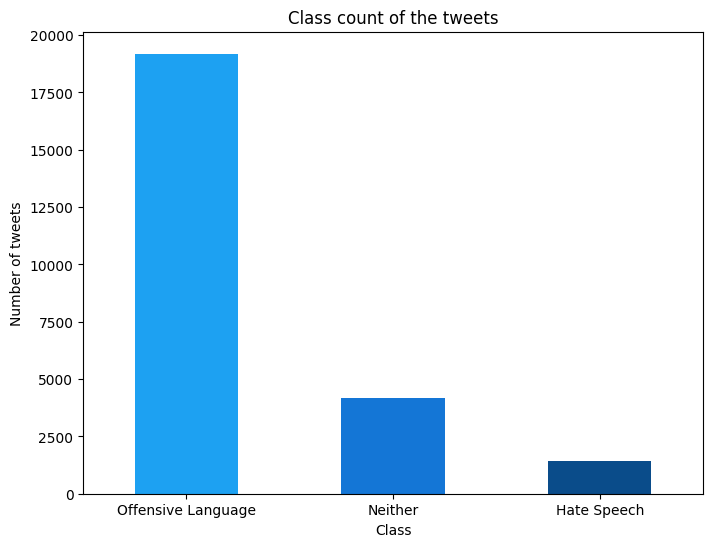

In [13]:
palette = ['#1DA1F2', '#1476D6', '#0A4C8A']

plt.figure(figsize=(8, 6))
class_counts.rename(index=class_labels).plot(kind='bar', color=palette)
plt.title('Class count of the tweets')
plt.xlabel('Class')
plt.ylabel('Number of tweets')
plt.xticks(rotation=0)
plt.show()

From this countplot it is evident that majority of the tweets are classified as offensive language. Hate speech and neither class on the other hand has a narrower gap between them. This class imbalance is a critical factor to be considered during data cleaning & preprocessing to ensure that the model does not become biased towards the dominant class which could affect the overall performance and fairless of the classification models.

In [14]:
import plotly.express as px
fig = px.pie(df, values=class_counts.values, names=class_labels, color=class_labels,
             color_discrete_map={'Hate Speech':'cyan',
                                 'Offensive Language':'royalblue',
                                 'Neither':'darkblue'})

fig.update_traces(textinfo='percent+label', texttemplate='%{label}<br>%{percent:.1%}', 
                  hovertemplate='%{label}: %{value}', 
                  marker=dict(line=dict(color='white', width=2)))

fig.update_layout(
    title = "Percentage distribution of the tweets by class"
)

fig.show()

From the pie chart I am able to see the percentage breakdown of the different tweet classes.
| class       | percentage |
|--------|-------|
| Hate Speech  | 77.4%    |
| Offensive Language  | 16.8%     |
| Neither  | 5.8%     |

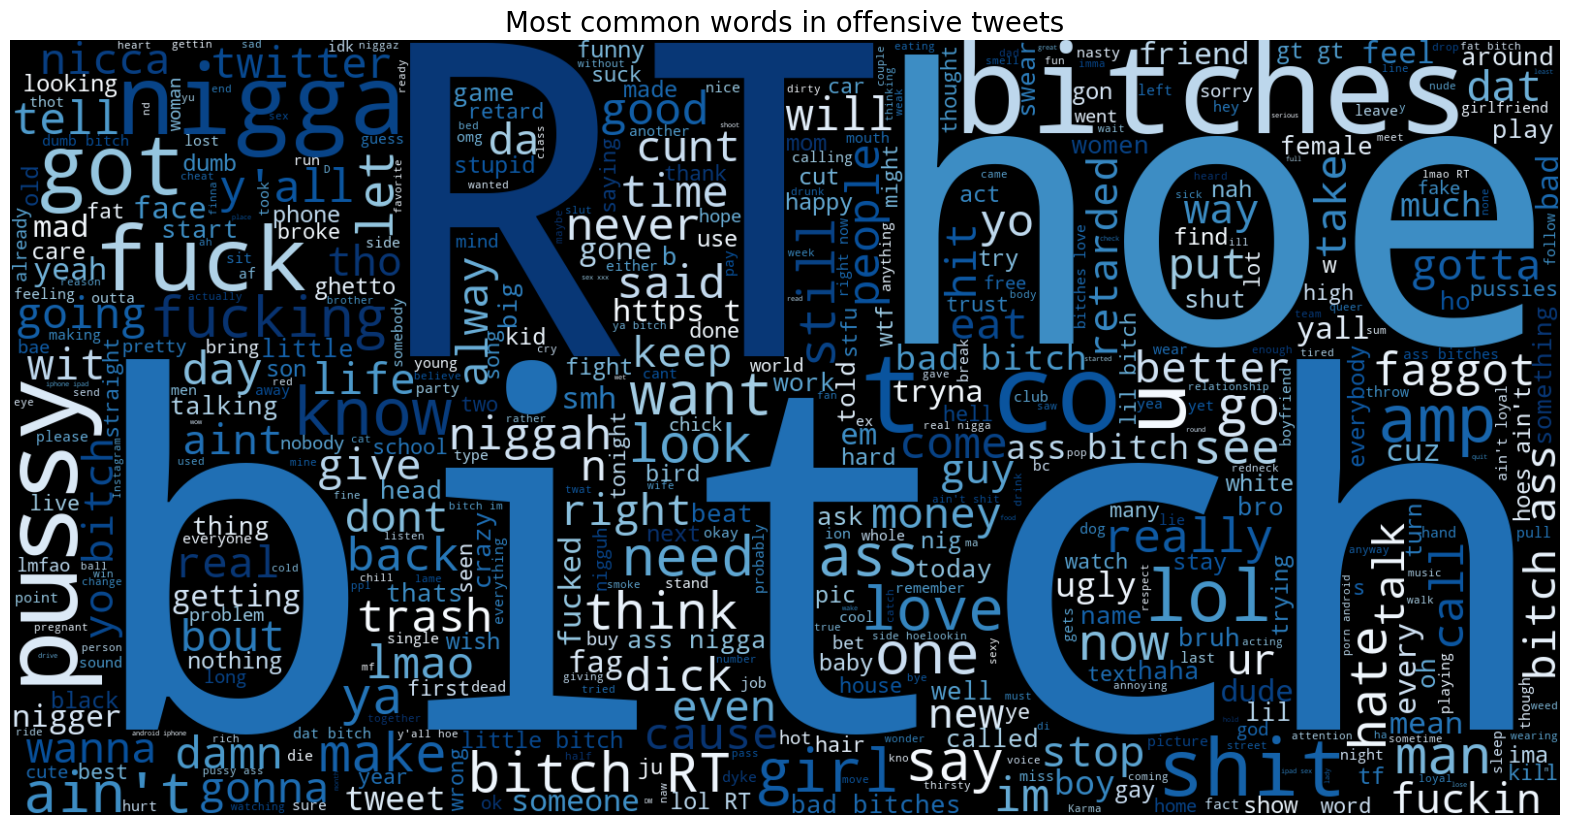

In [15]:
offensive_tweets = df[df['labels'] == 'Offensive Language']['tweet']

text = ' '.join(offensive_tweets)
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800, colormap='Blues').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most common words in offensive tweets', fontsize=20)
plt.show()

Through the word cloud I am able to see the common words present in the offensive tweets. 
Words such as 'bitch', 'RT', 'hoe', 'bitches', 'fuck' are most commonly present words.

However, the term 'RT' refers to retweet and it is not meaningful word in the sentence. By removing the term 'RT' from the sentences the meaning of the setence would not change and the NLP model will be able to focus on the actual words determing the classification. Will handle this during the data cleansing portion further down the notebook.

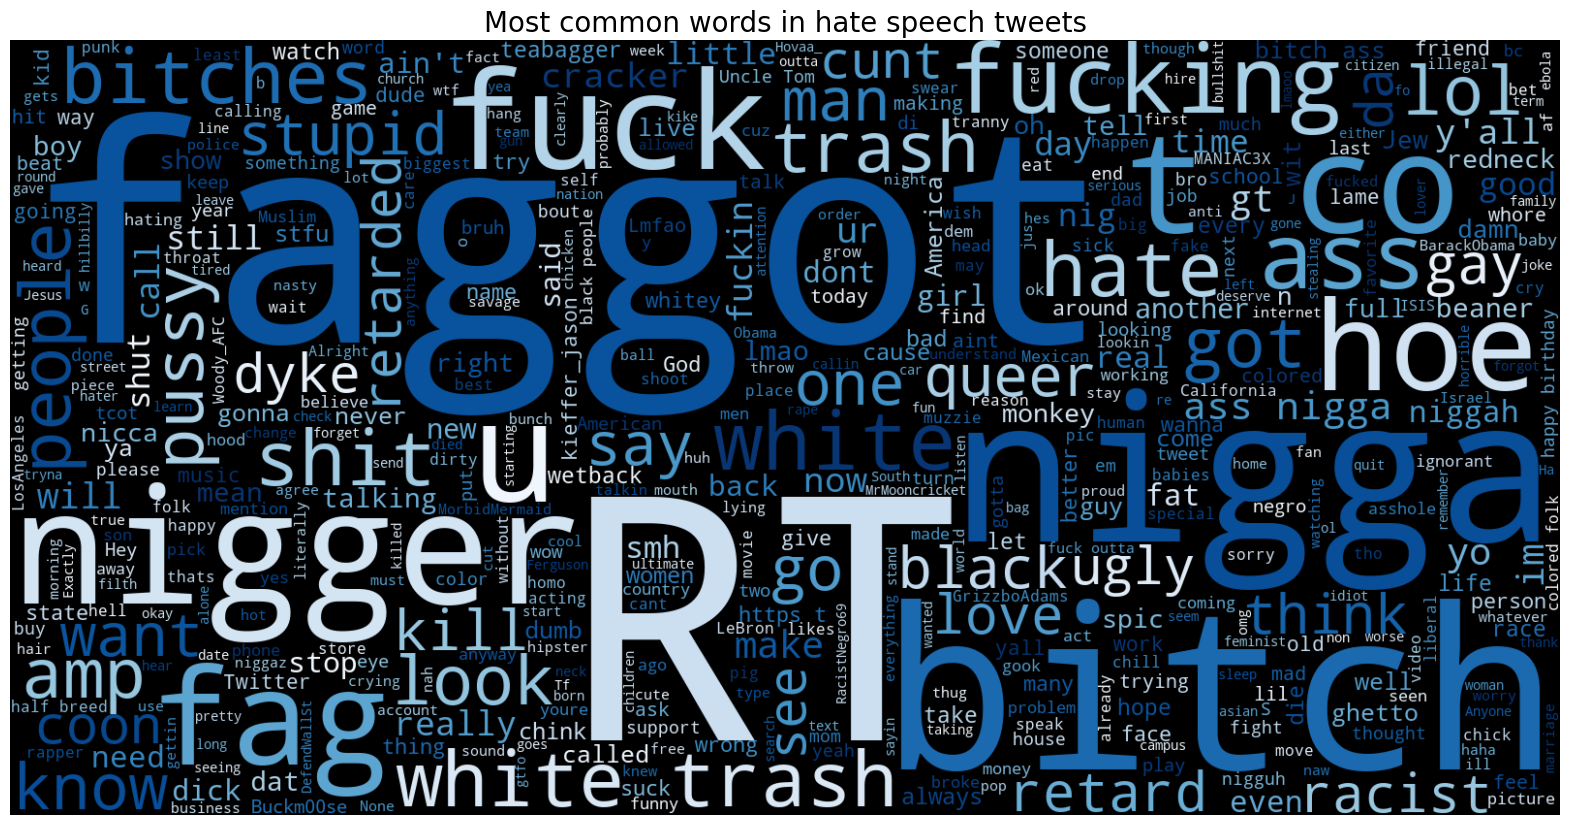

In [16]:
hate_tweets = df[df['labels'] == 'Hate Speech']['tweet']

text = ' '.join(hate_tweets)
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800, colormap='Blues').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most common words in hate speech tweets', fontsize=20)
plt.show()

Through the word cloud I am able to see the common words present in the hate speech tweets. 
Words such as 'faggot, 'nigga', 'RT', 'hoe', 'bitch', 'fuck' are most commonly present words.

Similar effect of term 'RT' to the modelling in the future (As explained above).

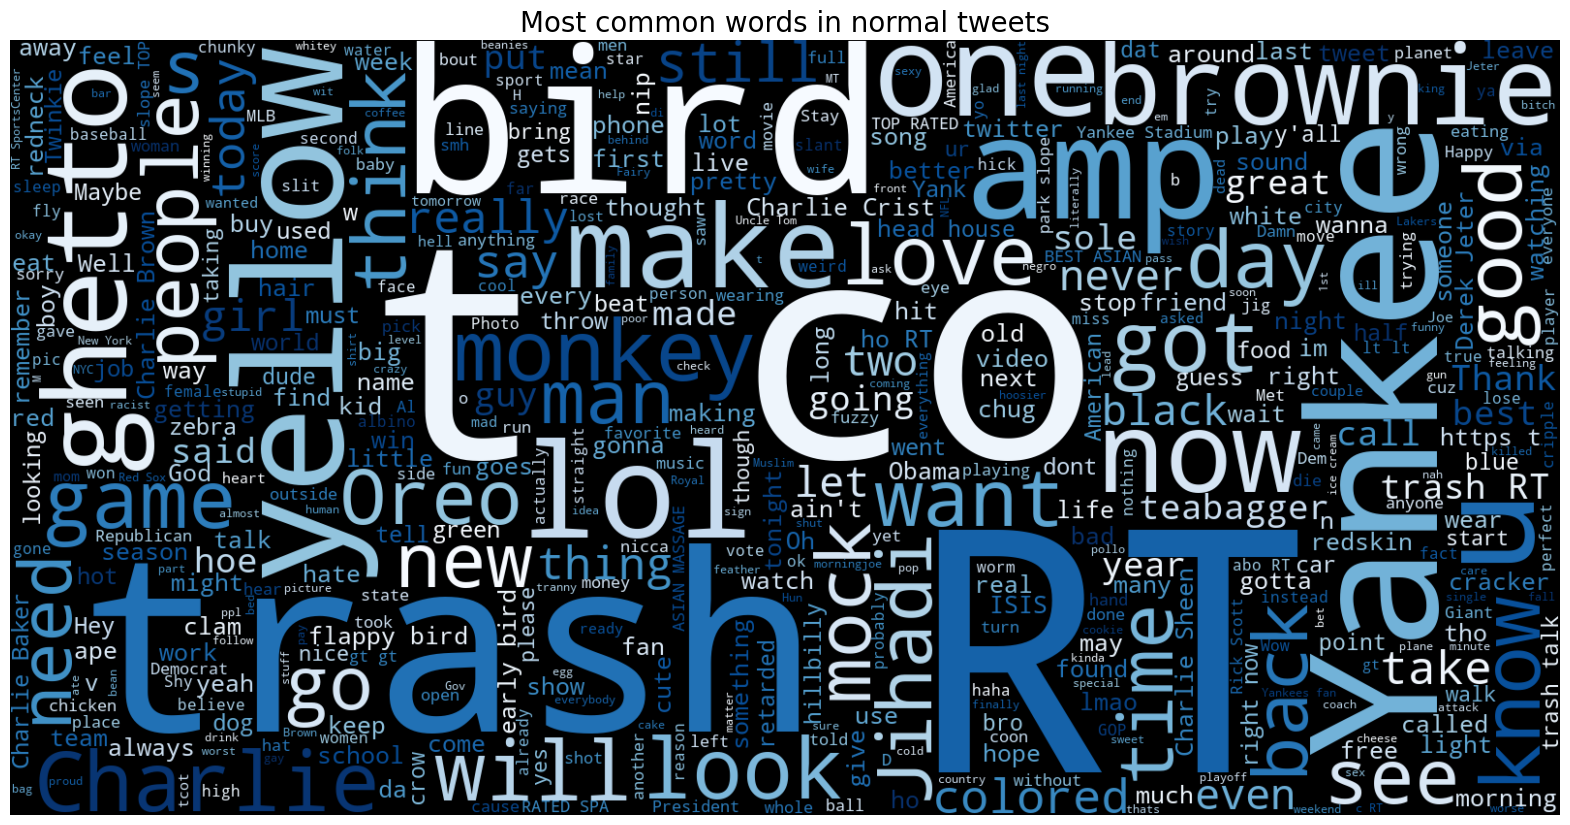

In [17]:
normal_tweets = df[df['labels'] == 'Neither']['tweet']

text = ' '.join(normal_tweets)
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800, colormap='Blues').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most common words in normal tweets', fontsize=20)
plt.show()

Through the word cloud I am are able to see the common words present in the normal tweets. 
Words such as 'lol', 'RT', 'CO', 'bird', 'trash', 'yell', 't' are most commonly present words.

Similar effect of term 'RT' to the modelling in the future (As explained above).
Term's such as 't', 'co' also comes under this case.

However, from the 3 word clouds I could not see the exact count of the common words occurences. Hence, I will generate a dataframe to view this.

In [18]:
normal_speech = df[df['labels'] == 'Neither']
hate_speech = df[df['labels'] == 'Hate Speech']
offensive_speech = df[df['labels'] == 'Offensive Language']

In [19]:
normal_speech.loc[:, 'word_list'] = normal_speech['tweet'].apply(lambda x: str(x).split())
hate_speech.loc[:, 'word_list'] = hate_speech['tweet'].apply(lambda x: str(x).split())
offensive_speech.loc[:, 'word_list'] = offensive_speech['tweet'].apply(lambda x: str(x).split())

def top_words(df, label):
    top = Counter([item for sublist in df['word_list'] for item in sublist])
    temp = pd.DataFrame(top.most_common(10))
    temp.columns = [label, 'count']
    return temp.style.background_gradient(cmap='Blues')

normal_words = top_words(normal_speech, 'Normal Words')
hate_words = top_words(hate_speech, 'Hate Speech Words')
offensive_words = top_words(offensive_speech, 'Offensive Words')

html = f"""
<div style='display: flex;  gap: 20px; text-align:center;'>
    <div>{offensive_words._repr_html_()}</div>
    <div>{hate_words._repr_html_()}</div>
    <div>{normal_words._repr_html_()}</div>
</div>
"""
display_html(html, raw=True)


Offensive Words 
 count 
 
 
 
 
 0 
 a 
 7301 
 
 
 1 
 bitch 
 6464 
 
 
 2 
 RT 
 5912 
 
 
 3 
 I 
 5252 
 
 
 4 
 the 
 4545 
 
 
 5 
 you 
 4092 
 
 
 6 
 to 
 3926 
 
 
 7 
 and 
 2639 
 
 
 8 
 my 
 2599 
 
 
 9 
 that 
 2588 
 
 
 
 
 
 
 
 
   
 Hate Speech Words 
 count 
 
 
 
 
 0 
 a 
 530 
 
 
 1 
 the 
 349 
 
 
 2 
 you 
 348 
 
 
 3 
 to 
 320 
 
 
 4 
 RT 
 320 
 
 
 5 
 I 
 296 
 
 
 6 
 and 
 219 
 
 
 7 
 is 
 194 
 
 
 8 
 bitch 
 164 
 
 
 9 
 that 
 161 
 
 
 
 
 
 
 
 
   
 Normal Words 
 count 
 
 
 
 
 0 
 the 
 1696 
 
 
 1 
 RT 
 1307 
 
 
 2 
 a 
 1268 
 
 
 3 
 to 
 994 
 
 
 4 
 I 
 924 
 
 
 5 
 and 
 812 
 
 
 6 
 in 
 687 
 
 
 7 
 of 
 671 
 
 
 8 
 is 
 634 
 
 
 9 
 trash 
 524

From this majority of the words are stop words. Stopwords are used commonly in english sentences for grammer and better flow.

In English, examples of stop words include:

Articles: a, an, the

Conjunctions: and, but, or

Prepositions: in, on, at, with

Pronouns: he, she, it, they

Common verbs: is, am, are, was, were, be, being, been

Therefore, to get the exact count of the common words bases on the labels, I need to omit the stop words. Even though this process is supposed to be done under data cleansing, for visualisation purposes will remove the stop words now and generate the dataframes again (Would use the respective word classes created instead of the tweet class). Tweet class would be properly cleansed in the data cleaning/preprocessing section.

In [20]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = str(text).split() 
    clean = [word for word in words if word.lower() not in stop_words]  
    return " ".join(clean)  

normal_speech['tweet'] = normal_speech['tweet'].apply(remove_stopwords)
hate_speech['tweet'] = hate_speech['tweet'].apply(remove_stopwords)
offensive_speech['tweet'] = offensive_speech['tweet'].apply(remove_stopwords)

In [21]:
normal_speech.loc[:, 'word_list'] = normal_speech['tweet'].apply(lambda x: str(x).split())
hate_speech.loc[:, 'word_list'] = hate_speech['tweet'].apply(lambda x: str(x).split())
offensive_speech.loc[:, 'word_list'] = offensive_speech['tweet'].apply(lambda x: str(x).split())

normal_words = top_words(normal_speech, 'Normal Words')
hate_words = top_words(hate_speech, 'Hate Speech Words')
offensive_words = top_words(offensive_speech, 'Offensive Words')

html = f"""
<div style='display: flex;  gap: 20px; text-align:center;'>
    <div>{offensive_words._repr_html_()}</div>
    <div>{hate_words._repr_html_()}</div>
    <div>{normal_words._repr_html_()}</div>
</div>
"""
display_html(html, raw=True)


Offensive Words 
 count 
 
 
 
 
 0 
 bitch 
 6464 
 
 
 1 
 RT 
 5912 
 
 
 2 
 bitches 
 2525 
 
 
 3 
 like 
 2095 
 
 
 4 
 hoes 
 1871 
 
 
 5 
 pussy 
 1667 
 
 
 6 
 hoe 
 1413 
 
 
 7 
 ass 
 1318 
 
 
 8 
 get 
 1136 
 
 
 9 
 got 
 1062 
 
 
 
 
 
 
 
 
   
 Hate Speech Words 
 count 
 
 
 
 
 0 
 RT 
 320 
 
 
 1 
 bitch 
 164 
 
 
 2 
 like 
 157 
 
 
 3 
 faggot 
 148 
 
 
 4 
 ass 
 127 
 
 
 5 
 white 
 116 
 
 
 6 
 nigga 
 103 
 
 
 7 
 u 
 96 
 
 
 8 
 fuck 
 87 
 
 
 9 
 nigger 
 82 
 
 
 
 
 
 
 
 
   
 Normal Words 
 count 
 
 
 
 
 0 
 RT 
 1307 
 
 
 1 
 trash 
 524 
 
 
 2 
 like 
 282 
 
 
 3 
 bird 
 232 
 
 
 4 
 Charlie 
 232 
 
 
 5 
 yellow 
 178 
 
 
 6 
 & 
 165 
 
 
 7 
 get 
 129 
 
 
 8 
 birds 
 121 
 
 
 9 
 - 
 116

Now I am able to see the number of occurences for each of the top 10 words for the respective classes. I can see that the word 'bitch' and 'bitches' dominate the offensive words category if I exclude 'RT'. However, for the hate speech words and normal words, they have a relatively balanced distribution. This might be due to the large amount of data for the offensive class causing such skewing to be present.

In [22]:
df['tweet_length'] = df['tweet'].apply(len)

fig = px.box(df, 
             x='class', 
             y='tweet_length', 
             color='class', 
             title='Tweet Length Distribution by Class',
             template='plotly_white', 
             color_discrete_sequence=['royalblue', 'cyan', 'blue'])

fig.update_traces(marker=dict(opacity=0.8, 
                              line=dict(width=2, color='#0077ff')))

fig.update_layout(
    title_font=dict(size=24, color='#0057d9', family='Courier New'),
    xaxis_title="Class",
    yaxis_title="Tweet Length",
    paper_bgcolor='white',
    plot_bgcolor='white',
    font=dict(color='#0057d9', family='Courier New'),
    hoverlabel=dict(bgcolor='#e6f2ff', font=dict(color='#002bb8')),
    showlegend=False
)

fig.update_xaxes(showgrid=True, gridwidth=0.8, gridcolor='#cce6ff')
fig.update_yaxes(showgrid=True, gridwidth=0.8, gridcolor='#cce6ff')

fig.show()

From the box plot I can clearly see that the offensive language class tends to have longer tweets. This means that offensive tweets often come in long rants or heated replies. Whereas the hate speech and normal speech classes tends to have a fewer outliers with a more compact distribution in the tweet length.

If I take a look at the median:
Normal speech has the longest median of 97.
Hate speech has a median of 82.
Offensive speech has a median of 78 with many extreme outliers leading up to 758.

I can conclue that the shorter the tweet, the more liekly it is to be offensive or hateful.
However, offensive tweets have the most variation in length, meaning people express anger both in short insults or long heated arguments.

Therefore, it is important to normalize the tweet length before feeding it into the model.

<div style="padding:10px; /* Smaller padding */
              color:#1DA1F2; 
              font-size:150%; /* Smaller Font */
              border-radius:20px; 
              border-width: 3px; /* Thinner Border */
              border-style: solid; 
              border-color: #1DA1F2; 
              background-color:white; 
              font-weight:500; 
              letter-spacing: 1px; 
              text-shadow: 1px 1px 5px rgba(29,161,242,0.8); 
              box-shadow: 0 0 10px rgba(29,161,242,0.5); 
              display: inline-block; 
              width: auto; /* Smaller Width */
              margin: auto;">3 |
  Data Preprocessing & Data Cleaning
  </div>

In [23]:
df.isnull().sum()

count                       0
hate_speech_count           0
offensive_language_count    0
neither_count               0
class                       0
tweet                       0
labels                      0
tweet_length                0
dtype: int64

In [24]:
df.head()

count  hate_speech_count  offensive_language_count  neither_count  class  \
0      3                  0                         0              3      2   
1      3                  0                         3              0      1   
2      3                  0                         3              0      1   
3      3                  0                         2              1      1   
4      6                  0                         6              0      1   

                                               tweet              labels  \
0  !!! RT @mayasolovely: As a woman you shouldn't...             Neither   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  Offensive Language   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  Offensive Language   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  Offensive Language   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  Offensive Language   

   tweet_length  
0           140  
1            85  
2           120  
3            62  
4           137

Since I want to classify whether a tweet is positive or negative I will merge the offensive language and hate speech to negative tweet and consider the neither label as a positive tweet.

In [25]:
df['class'] = df['class'].apply(lambda x: 0 if x in [0, 1] else 1)
df.head()

count  hate_speech_count  offensive_language_count  neither_count  class  \
0      3                  0                         0              3      1   
1      3                  0                         3              0      0   
2      3                  0                         3              0      0   
3      3                  0                         2              1      0   
4      6                  0                         6              0      0   

                                               tweet              labels  \
0  !!! RT @mayasolovely: As a woman you shouldn't...             Neither   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  Offensive Language   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  Offensive Language   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  Offensive Language   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  Offensive Language   

   tweet_length  
0           140  
1            85  
2           120  
3            62  
4           137

In [26]:
class_labels = {0: 'negative', 1: 'positive'}
df['labels'] = df['class'].map(class_labels)
df.head()

count  hate_speech_count  offensive_language_count  neither_count  class  \
0      3                  0                         0              3      1   
1      3                  0                         3              0      0   
2      3                  0                         3              0      0   
3      3                  0                         2              1      0   
4      6                  0                         6              0      0   

                                               tweet    labels  tweet_length  
0  !!! RT @mayasolovely: As a woman you shouldn't...  positive           140  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  negative            85  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  negative           120  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  negative            62  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  negative           137

I will now clean the data before starting on feature engineering

In [27]:
stop_words = stopwords.words('english')
stop_words.remove('not')  # Keeping 'not' as it is important in negation (Can change the meaning of the sentence)

def clean(text):

    # Remove 'RT' (Retweet indicator)
    text = re.sub(r'\bRT\b', '', text)

    # Remove URLs 
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # Remove Twitter handles 
    text = re.sub(r'@\w+', '', text)

    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)

    # Convert to lowercase
    text = text.lower()

    # Tokenize the text
    words = text.split()

    # Removing the stop words
    words = [word for word in words if word not in stop_words]
    
    # Rejoin the words back into a single string
    cleaned_text = ' '.join(words)
    
    return cleaned_text

In [28]:
df.loc[:, 'cleaned_tweet'] = df['tweet'].apply(clean)
df.head()

count  hate_speech_count  offensive_language_count  neither_count  class  \
0      3                  0                         0              3      1   
1      3                  0                         3              0      0   
2      3                  0                         3              0      0   
3      3                  0                         2              1      0   
4      6                  0                         6              0      0   

                                               tweet    labels  tweet_length  \
0  !!! RT @mayasolovely: As a woman you shouldn't...  positive           140   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  negative            85   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  negative           120   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  negative            62   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  negative           137   

                                       cleaned_tweet  
0  woman complain cleaning house amp man always t...  
1  boy dats cold tyga dwn bad cuffin dat hoe st p...  
2       dawg ever fuck bitch start cry confused shit  
3                                   look like tranny  
4     shit hear might true might faker bitch told ya

Removing the outliers from the dataset based on the tweet length, so as to have a fair & balanced modelling in the later part of the project.

In [29]:
print(df.shape)

tweet_length = df['cleaned_tweet'].apply(len)

Q1 = tweet_length.quantile(0.25)
Q3 = tweet_length.quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(tweet_length >= lower_bound) & (tweet_length <= upper_bound)]

print(df.shape)


(24783, 9)
(24737, 9)


After this process I can see that 46 outlier data was removed from the dataset.

In [30]:
df.drop(['tweet', 'tweet_length'], axis=1, inplace=True)
df.head()

count  hate_speech_count  offensive_language_count  neither_count  class  \
0      3                  0                         0              3      1   
1      3                  0                         3              0      0   
2      3                  0                         3              0      0   
3      3                  0                         2              1      0   
4      6                  0                         6              0      0   

     labels                                      cleaned_tweet  
0  positive  woman complain cleaning house amp man always t...  
1  negative  boy dats cold tyga dwn bad cuffin dat hoe st p...  
2  negative       dawg ever fuck bitch start cry confused shit  
3  negative                                   look like tranny  
4  negative     shit hear might true might faker bitch told ya

In [31]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

count  hate_speech_count  offensive_language_count  neither_count  \
563        3                  0                         3              0   
873        3                  0                         1              2   
883        3                  0                         3              0   
1028       3                  0                         3              0   
1223       3                  0                         3              0   
...      ...                ...                       ...            ...   
24589      3                  0                         3              0   
24609      3                  0                         0              3   
24660      3                  0                         2              1   
24724      3                  0                         3              0   
24749      3                  1                         2              0   

       class    labels                                      cleaned_tweet  
563        0  negative                                         hoes loyal  
873        1  positive         porn android iphone ipad sex xxx desi paki  
883        0  negative  porn android iphone ipad sex xxx hairy hairy p...  
1028       0  negative                                               cunt  
1223       0  negative                                         hoes loyal  
...      ...       ...                                                ...  
24589      0  negative                                       need bitches  
24609      1  positive                                              trash  
24660      0  negative                                                hoe  
24724      0  negative                             give bitch inch rather  
24749      0  negative                                  yo hoe get slayed  

[687 rows x 7 columns]

Removing the duplicate rows to prevent the biasness during modelling in the next phase of the project.

In [32]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)
df = df.dropna()

In [33]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

Empty DataFrame
Columns: [count, hate_speech_count, offensive_language_count, neither_count, class, labels, cleaned_tweet]
Index: []

In [34]:
df.to_csv('cleaned_dataset.csv', index=False)

<div style="padding:10px; /* Smaller padding */
              color:#1DA1F2; 
              font-size:150%; /* Smaller Font */
              border-radius:20px; 
              border-width: 3px; /* Thinner Border */
              border-style: solid; 
              border-color: #1DA1F2; 
              background-color:white; 
              font-weight:500; 
              letter-spacing: 1px; 
              text-shadow: 1px 1px 5px rgba(29,161,242,0.8); 
              box-shadow: 0 0 10px rgba(29,161,242,0.5); 
              display: inline-block; 
              width: auto; /* Smaller Width */
              margin: auto;">4 |
  Feature Engineering
  </div>

#### Stemming & Lemmatization

<div>
<p><strong>Stemming and Lemmatization</strong> are processes that reduce word variants to root form.</p>
</div>
<div style="display: flex; align-items: center; justify-content: space-between;">
  <div>
    <p>Stemmers eliminate word suffixes by running input word tokens against a pre-defined list of common suffixes. In NLP use cases, especially in sentiment analysis, it is important to perform stemming as getting the base word is important to classify if a word is positive or negative.</p>
    <p>The common stemmer algorithms are <strong>Snowball</strong> and <strong>Porter</strong> stemmers which uses mathematical methods to eliminate suffixes.</p>
  </div>
</div>
<div style="display: flex; align-items: center; justify-content: space-between;">
  <div>
    <p>The purpose of lemmatization is the same as stemming, however it overcomes the drawbacks of stemming. While stemming merely removes common suffixes from the end of the word, lemmatization ensures that the output word is an existing normalized form of the word that can be found in the english dictionary (in the context of english words).</p> 
    <p>Therefore, lemmatization gives a more meaningful output for NLP tasks such as sentiment analysis.</p>
  </div>
</div>


<div style="display: flex; gap: 20px; align-items: center;">
  <img src="stemming.png" alt="Image Description" width="300" style="border-radius: 20px; box-shadow: 0 0 15px rgba(29,161,242,0.8);">
  <img src="lemmatization.png" alt="Image Description" width="300" style="border-radius: 20px; box-shadow: 0 0 15px rgba(29,161,242,0.8);">
  
  <div style="margin-left: auto;">
    <p style="font-size: 18px; color: white;">
      Pros & Cons of Stemming and Lemmatization
    </p>
    <p>Stemming is considered as a fast approach. However, the trade off is that the output might have inacuuracies and may differ in the meaning of the text.</p>
    <p>On the other hand lemmatization produces a better results by preserving the meaning and grammatical function. However, it is a much slwower process due to more complex linguistic analysis, including dictionary lookups and part-of-speech tagging, to accurately derive the base form of a word based on its context.</p>
    <p>One good example of Stemming vs Lemmatizaton will be on the word 'Caring'. Stemming will result in 'Car' which is completely a different word and holds a different meaning. Whereas, lemmatization will result in 'Care' which is a more accurate and applicable data when it comes to sentiment analysis.</p>
    <p>Therefore, in this project lemmatization will be utilised.</p>
  </div>
</div>

In [35]:
lemmatizer = WordNetLemmatizer()

from nltk.corpus import wordnet
from nltk import pos_tag

def get_wordnet_pos(word):
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {"N": wordnet.NOUN, "V": wordnet.VERB, "J": wordnet.ADJ, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens]
    return " ".join(lemmatized_tokens)

df['cleaned_tweet'] = df['cleaned_tweet'].apply(lemmatize_text) 

df[['cleaned_tweet']].head()

cleaned_tweet
0  woman complain cleaning house amp man always t...
1  boy dat cold tyga dwn bad cuffin dat hoe st place
2        dawg ever fuck bitch start cry confuse shit
3                                   look like tranny
4     shit hear might true might faker bitch told ya

#### Oversampling & Undersampling

<p><strong>Oversampling and Undersampling</strong> are techniques used to balance datasets that have an uneven distribution of classes. .</p>

Oversampling replicates samples from the minority class. This is to even out the distribution with the majority class. However, this creates artificial class distributions that are different from real-world conditions.

Undersampling removes samples form the majoirty class. This is to even out the distribution with the minority class. However, undersampling could lose valuable information.

<div style="display: flex; gap: 20px; align-items: center;">
  <img src="sampling.png" alt="Image Description" width="700" style="border-radius: 10px; box-shadow: 0 0 15px rgba(29,161,242,0.8);">
  
  <div style="margin-left: auto;">
    <p>From looking at the pros and cons of the two sampling techniques, I can conclude that undersampling is better as it does not create artificial data which could heavily impact NLP tasks such as sentiment analysis. Fortunately, in my case I will be using undersampling.</p>
    <p>This is because, the exploratory data analysis I found out the the offensive class had the majority of the data. Moreover, during our data preprocessing steps I combined the offensive and hate speech classes and classified them as negative class. This means that the data imbalance got worse as now the ratio between negative and positive class is on a wider range.</p>
    <p>Therefore, an undersampling approach has to be taken to overcome the class imbalance.</p>
  </div>
</div>

In [36]:
df_majority=df[(df['class']==0)] # Negative
df_minority=df[(df['class']==1)] # Positive

In [37]:
df_majority_undersample=resample(df_majority,
                                 replace=False,
                                 n_samples=df_minority.shape[0],
                                 random_state=42)

df_balanced = pd.concat([df_majority_undersample, df_minority])

In [38]:
class_dist = df_balanced['class'].value_counts().reset_index()
class_dist.columns = ['Class', 'Percentage']
class_dist['Percentage'] = class_dist['Percentage'].div(df.shape[0]).multiply(100).round(3)

print(tabulate(class_dist, headers='keys'))
print('------------------------------------')
print("Balanced dataset's size: " + str(df_balanced.shape))

      Class    Percentage
--  -------  ------------
 0        0        16.877
 1        1        16.877
------------------------------------
Balanced dataset's size: (8118, 7)


After the undersampling process now both the classes have even distribution of data summing up to approximately 34% of the dataset (8076 entries). Even though we lost bulk of the dataset, the current dataset would be a much better fit for the modelling compared to the first iteration. 

#### Sentiment polarity

VADER (Valence Aware Dictionary and Sentiment Reasoner) is a pre-trained sentiment analysis model built specifically for social media. 
It allows intensity scores to be generated based the emotional value behind the text. 

VADER gives 4 sentiment scores:

| Score       | What It Means       |        | Compound Score | Meaning     |
|-------------|--------------------|--------|----------------|-------------|
| pos        | Positive Percentage |        | > 0.05        | Positive    |
| neu        | Neutral Percentage  |        | -0.05 to 0.05 | Neutral     |
| neg        | Negative Percentage |        | < -0.05       | Negative    |
| compound   | Final Sentiment Score |       |              |            |


<div style="display: flex; gap: 20px; align-items: center;">
  <img src="emotions.webp" alt="Image Description" width="700" style="border-radius: 10px; box-shadow: 0 0 15px rgba(29,161,242,0.8);">
  
  <div style="margin-left: auto;">
    <p>Applying VADER to generate a new column in the dataset causing the dataset to be more informative.</p>
    <p>I am able to identify the hidden meaning behind the tweets. Not all negative tweets is reflective of negative emotions. There are hidden meaning such as positive sacarsm, positive negation. For instace phrases such as <strong>'not bad'</strong> is a positive sacarsm and without the compound score it can be misclassified by the model during the modelling phase of the project. </p>  
    <p>Ultimately, the ML model do not understand emotions — it only works with numbers. Therefore, by adding these sentiment scores as extra numerical features, the model will have more context about what the text means emotionally resulting in better predictions.</p>
  </div>
</div>

In [39]:
sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']

df_balanced['sentiment_score'] = df_balanced['cleaned_tweet'].apply(get_sentiment)
df_balanced.head()

count  hate_speech_count  offensive_language_count  neither_count  \
10507      3                  0                         3              0   
7807       3                  0                         2              1   
2106       3                  1                         2              0   
10986      3                  0                         2              1   
15145      3                  0                         3              0   

       class    labels                                      cleaned_tweet  \
10507      0  negative      roll blunt well bitch havana cause king round   
7807       0  negative            boat n hoe boat n hoe get ta boat n hoe   
2106       0  negative  loud jamaican horn u still single yall find ug...   
10986      0  negative  officially dub nasty un natural shade red look...   
15145      0  negative                                      nothing bitch   

       sentiment_score  
10507          -0.4019  
7807            0.0000  
2106           -0.2263  
10986           0.2023  
15145           0.4717

#### Weight Factor/Annotator Agreement score

<div style="display: flex; gap: 20px; align-items: center;">
  <img src="weights.png" alt="Image Description" width="500" style="border-radius: 10px; box-shadow: 0 0 15px rgba(29,161,242,0.8);">
  
  <div style="margin-left: auto;">
    <p>Weight score refers to the annotator agreement score based on the count of how many humans classified the tweet as hate_speech, offensive, or neutral. 
By adding this feature, it gives the model more context on the human perception of the tweet. This feature will act as the confidence score for the class labels (target), allowing the model to weigh highly agreed classifications more heavily while treating uncertain classifications with lower priority during the training phase.</p>

<p>To calulate this score I will use the <strong>Disagreement Penalty Method</strong>. The goal of this method is to assign higher weight to tweets where there is stronger agreement while penalizing tweets with high disagreement.</p>


<strong>To sum it up<strong>:
<table style="width:100%; border-collapse: collapse; text-align: left; margin-bottom: 20px;">
  <thead>
    <tr>
      <th style="padding: 10px; border: 1px solid #ddd;">Advantage</th>
      <th style="padding: 10px; border: 1px solid #ddd;">Explanation</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="padding: 10px; border: 1px solid #ddd;"><b>Improves Model Performance</b></td>
      <td style="padding: 10px; border: 1px solid #ddd;">Helps the model prioritize highly agreed classifications, leading to better performance during the modelling phase.</td>
    </tr>
    <tr>
      <td style="padding: 10px; border: 1px solid #ddd;"><b>Handles Ambiguity</b></td>
      <td style="padding: 10px; border: 1px solid #ddd;">Asssits the model in identifying potentially confusing or subjective tweets</td>
    </tr>
    <tr>
      <td style="padding: 10px; border: 1px solid #ddd;"><b>Enhances Data Quality</b></td>
      <td style="padding: 10px; border: 1px solid #ddd;">Provides an additinal layer of information beyond just the tweets</td>
    </tr>
  </tbody>
</table>
  </div>
</div>

In [40]:
alpha = 0.5

def calculate_weight(row):
    total =  row[['hate_speech_count', 'offensive_language_count', 'neither_count']].sum()
    majority =  row[['hate_speech_count', 'offensive_language_count', 'neither_count']].max()
    remaining = total - majority

    return majority - alpha * remaining

df_balanced['weight'] = df_balanced.apply(calculate_weight, axis=1)

In [41]:
df_balanced.head()

count  hate_speech_count  offensive_language_count  neither_count  \
10507      3                  0                         3              0   
7807       3                  0                         2              1   
2106       3                  1                         2              0   
10986      3                  0                         2              1   
15145      3                  0                         3              0   

       class    labels                                      cleaned_tweet  \
10507      0  negative      roll blunt well bitch havana cause king round   
7807       0  negative            boat n hoe boat n hoe get ta boat n hoe   
2106       0  negative  loud jamaican horn u still single yall find ug...   
10986      0  negative  officially dub nasty un natural shade red look...   
15145      0  negative                                      nothing bitch   

       sentiment_score  weight  
10507          -0.4019     3.0  
7807            0.0000     1.5  
2106           -0.2263     1.5  
10986           0.2023     1.5  
15145           0.4717     3.0

This marks the end of feature engineering! I will drop the columns that are not needed for the modelling and prepare the dataset for the modelling phase of the project.

In [42]:
df_balanced.drop(['count', 'hate_speech_count', 'offensive_language_count', 'neither_count'], axis=1, inplace=True)

In [43]:
df_balanced # Final dataset that will be used for modelling

class    labels                                      cleaned_tweet  \
10507      0  negative      roll blunt well bitch havana cause king round   
7807       0  negative            boat n hoe boat n hoe get ta boat n hoe   
2106       0  negative  loud jamaican horn u still single yall find ug...   
10986      0  negative  officially dub nasty un natural shade red look...   
15145      0  negative                                      nothing bitch   
...      ...       ...                                                ...   
24004      1  positive                    yaya ho cute avi tho idea sleep   
24005      1  positive  yea new friend friend kno allow one cute darki...   
24034      1  positive  know say early bird get worm put gummy worm mo...   
24046      1  positive      go broke wrong heart baby drove redneck crazy   
24049      1  positive  ruffle ntac eileen dahlia beautiful color comb...   

       sentiment_score  weight  
10507          -0.4019     3.0  
7807            0.0000     1.5  
2106           -0.2263     1.5  
10986           0.2023     1.5  
15145           0.4717     3.0  
...                ...     ...  
24004           0.4588     3.0  
24005           0.9460     1.5  
24034           0.0000     1.5  
24046          -0.8074     1.5  
24049           0.5994     3.0  

[8118 rows x 5 columns]

Doing a final check if the dataset is clean and ready for modelling

In [44]:
df_balanced.isna().sum()

class              0
labels             0
cleaned_tweet      0
sentiment_score    0
weight             0
dtype: int64

In [45]:
df_balanced[df_balanced['cleaned_tweet'] == '']

class    labels cleaned_tweet  sentiment_score  weight
4685      1  positive                            0.0     1.5

In [46]:
df_balanced = df_balanced[df_balanced['cleaned_tweet'].str.strip() != '']
df_balanced[df_balanced['cleaned_tweet'] == '']

Empty DataFrame
Columns: [class, labels, cleaned_tweet, sentiment_score, weight]
Index: []

I will make a copy of the latest cleaned dataset to use in the future if ever needed.

In [47]:
df_balanced.to_csv('train_balanced.csv', index=False)

<div style="padding:10px; /* Smaller padding */
              color:#1DA1F2; 
              font-size:150%; /* Smaller Font */
              border-radius:20px; 
              border-width: 3px; /* Thinner Border */
              border-style: solid; 
              border-color: #1DA1F2; 
              background-color:white; 
              font-weight:500; 
              letter-spacing: 1px; 
              text-shadow: 1px 1px 5px rgba(29,161,242,0.8); 
              box-shadow: 0 0 10px rgba(29,161,242,0.5); 
              display: inline-block; 
              width: auto; /* Smaller Width */
              margin: auto;">5 |
  Modelling & Evaluation
  </div>

#### Count Vectorizer vs Tfidf Vectorizer

CountVectorizer does the job of creating a word count table. It takes in the collection of text data and converts it into a matrix of token counts. Each row represents the text/sentence and each column represents a unique word (or token). The values indicates how many times each word appears within the sentence/text.

Suppose you have three sentences:

"I love coding."
"Coding is fun."
"I love learning new things."
Using CountVectorizer, the result might look something like this:

|        | coding | fun | i | is | learning | love | new | things |
|--------|-------|-----|---|----|----------|------|-----|-------|
| Doc 1  | 1     | 0   | 1 | 0  | 0        | 1    | 0   | 0     |
| Doc 2  | 1     | 1   | 0 | 1  | 0        | 0    | 0   | 0     |
| Doc 3  | 0     | 0   | 1 | 0  | 1        | 1    | 1   | 1     |

TfidfVectorizer is an extension of CountVectorizer. While CountVectorizer counts the words, TfidfVectorizer goes a step further and addtionally considers the importance of words across all the sentences. It assigns more weight to words that appear more frequently in a single input but are rare across other inputs, making it to better distinguish between words like "a" and actual meaningful terms.

|        | coding | fun | i | is | learning | love | new | things |
|--------|-------|-----|---|----|----------|------|-----|-------|
| Doc 1  | 0.70710678     | 0   | 0.70710678 | 0  | 0        | 0.70710678   | 0   | 0     |
| Doc 2  | 0.4736296     | 0.4736296   | 0 | 0.40204024  | 0       | 0    | 0   | 0     |
| Doc 3  | 0     | 0   | 0.52863461 | 0  | 0.40204024        | 0.40204024    | 0.52863461   | 0.52863461     |

#### Streamlining Classification Algorithms with Pipelines

<div style="display: flex; gap: 20px; align-items: center;">
  <img src="pipeline.png" alt="Image Description" width="300" style="border-radius: 10px; box-shadow: 0 0 15px rgba(29,161,242,0.8);">
  
  <div style="margin-left: auto;">
    <p>The pipeline class allows for a more streamlined and modular machine learning workflow by chaining multiple moedlling steps togeather. This simplies the code and avoids code duplication while also eliminating the risk of data leakage by making sure that transformations are applied consistently.</p>
    <p>The pipeline will automatically apply the fit_transform() for the CountVectorizer() first, then pass the transformed data into the model (MultinomialNB()).</p>  
    Example:
    <br>
    CountVectorizer → .fit_transform(X_train)
    <br>
    MultinomialNB → .fit(transformed_data, y_train)
    <br>
    <br>
    .fit_transform() will build the vocabulary and convert text to numbers using the vectorizers.
    <br>
    .fit() will then allow the classification model to learn the class probabilities from the numbers before making the prediction.
  </div>
</div>

In [48]:
pipe_nb_cv = Pipeline(steps=[
    ('cv', CountVectorizer(ngram_range=(1, 3))),
    ('nb', MultinomialNB())
])
pipe_nb_tfidf = Pipeline(steps=[
    ('tfidf', TfidfVectorizer(ngram_range=(1, 3))),
    ('nb', MultinomialNB())
])
pipe_lr_cv = Pipeline(steps=[
    ('cv', CountVectorizer(ngram_range=(1, 3))),
    ('lr', LogisticRegression())
])
pipe_lr_tfidf = Pipeline(steps=[
    ('tfidf',TfidfVectorizer(ngram_range=(1, 3))),
    ('lr', LogisticRegression())
])
pipe_rf_cv = Pipeline([
    ('cv', CountVectorizer(ngram_range=(1, 3))),
    ('rf', RandomForestClassifier())
])
pipe_rf_tfidf = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 3))),
    ('rf', RandomForestClassifier())
])
pipe_svm_cv = Pipeline([
    ('cv', CountVectorizer(ngram_range=(1, 3))),
    ('svm', SVC(kernel='linear', C=1))
])
pipe_svm_tfidf = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 3))),
    ('svm', SVC(kernel='linear', C=1))
])

In [49]:
pipelines = [pipe_nb_cv, pipe_nb_tfidf, pipe_lr_cv, pipe_lr_tfidf, pipe_rf_cv, pipe_rf_tfidf, pipe_svm_cv, pipe_svm_tfidf]

In [50]:
# Base line evaluation (Using raw data) w/o hyperparameter tuning
df=pd.read_csv("train.csv")
df['class'] = df['class'].apply(lambda x: 0 if x in [0, 1] else 1)
class_labels = {0: 'negative', 1: 'positive'}
df['labels'] = df['class'].map(class_labels)

x = df['tweet']
y = df['class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

df_train = pd.concat([x_train, y_train], axis=1)
df_majority = df_train[df_train['class'] == 0]
df_minority = df_train[df_train['class'] == 1]

df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=42)
df_balanced_baseline = pd.concat([df_majority_downsampled, df_minority])

x_train = df_balanced_baseline['tweet']
y_train = df_balanced_baseline['class']

results_baseline = []

for pipe in pipelines:
    model_name = list(pipe.named_steps.keys())[1]
    vectorizer = list(pipe.named_steps.keys())[0]
    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)
    acc = accuracy_score(y_test, y_pred)

    results_baseline.append({
        'Model': model_name,
        'Vectorizer': vectorizer,
        'Accuracy': acc
    })

df_baseline = pd.DataFrame(results_baseline)

df_baseline = df_baseline.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

df_baseline

Model Vectorizer  Accuracy
0   svm      tfidf  0.932621
1   svm         cv  0.926165
2    nb      tfidf  0.923946
3    nb         cv  0.922937
4    rf      tfidf  0.919306
5    lr         cv  0.913052
6    rf         cv  0.909824
7    lr      tfidf  0.909623

Based of the baseline modelling, svm tends to perform the best with accuracy levels ranging from 92-93%. Possible reasoning for such high accuracy levels can be due to the quality of the dataset. Since this is a human annotated dataset and a huge team was assigned to work on this, the data quality of this dataset is already top-notch. Meaning the classifiers were able to classify the tweets well even without the data being cleaned.

In [51]:
# Intitial evaluation (Using cleansed data) w/o hyperparameter tuning
x=df_balanced['cleaned_tweet']
y=df_balanced['class']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
results_initial = []

for pipe in pipelines:
    model_name = list(pipe.named_steps.keys())[1]
    vectorizer = list(pipe.named_steps.keys())[0]
    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)
    acc = accuracy_score(y_test, y_pred)

    results_initial.append({
        'Model': model_name,
        'Vectorizer': vectorizer,
        'Accuracy': acc
    })

df_results = pd.DataFrame(results_initial)

df_results = df_results.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

df_results

Model Vectorizer  Accuracy
0   svm         cv  0.945197
1    rf         cv  0.943350
2   svm      tfidf  0.940887
3    lr      tfidf  0.940271
4    lr         cv  0.937192
5    rf      tfidf  0.924261
6    nb         cv  0.914409
7    nb      tfidf  0.912562

Initial evaluation was done based on the dataset after cleaning. As expected the accuracy levels rose. The best performing models were random forest and support vector machines which had accuracy levels ranging between 94-95% which is an improvement from the initial 92-93%.

In [52]:
# Checking if by adding weights there is a improvment to the accuracy levels
x=df_balanced['cleaned_tweet']
y=df_balanced['class']
weights = df_balanced['weight']

x_train, x_test, y_train, y_test, weights_train, weights_test = train_test_split(x, y, weights, test_size=0.2, random_state=42)
results_weight = []

for pipe in pipelines:
    model_name = list(pipe.named_steps.keys())[1]
    vectorizer = list(pipe.named_steps.keys())[0]
    if 'sample_weight' in pipe.named_steps[model_name].fit.__code__.co_varnames:  # Check if model supports weights
        pipe.fit(x_train, y_train, **{f"{model_name}__sample_weight": weights_train})
    else:
        pipe.fit(x_train, y_train)  # No weights if model doesn't support it 
    y_pred = pipe.predict(x_test)
    acc = accuracy_score(y_test, y_pred)

    results_weight.append({
        'Model': model_name,
        'Vectorizer': vectorizer,
        'Accuracy': acc
    })

df_results_weight = pd.DataFrame(results_weight)

df_results_weight = df_results_weight.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

df_results_weight

Model Vectorizer  Accuracy
0   svm         cv  0.945197
1   svm      tfidf  0.940887
2    lr      tfidf  0.940271
3    rf         cv  0.940271
4    lr         cv  0.937192
5    rf      tfidf  0.923645
6    nb         cv  0.914409
7    nb      tfidf  0.912562

After adding the weights to the random forest model it can be seen that  the random forest model under count vectorizer had little to no change in the accuracy levels whereas the random forest model under the TF-IDF vectorizer deproved with minor drop. Reasoning for this is because under count vectorizer initially its just based of the number of occurrences by adding weights, the data set could be more informative causing good prediction.

However, TF-IDF already gives more weight to rare words, so by adding more weights it might cause overfitting causing the accuracy levels to drop. Therfore, I should only add weights for the random forest model under cout vectorizer if I am using that for evaluation.

From these 3 experiments I can conclude that random foreset and support vector machines models work the best for this project. Let's now work on improving the accuracy level using hyperparameter tuning using GridSearch.

<div style="padding:10px; /* Smaller padding */
              color:#1DA1F2; 
              font-size:150%; /* Smaller Font */
              border-radius:20px; 
              border-width: 3px; /* Thinner Border */
              border-style: solid; 
              border-color: #1DA1F2; 
              background-color:white; 
              font-weight:500; 
              letter-spacing: 1px; 
              text-shadow: 1px 1px 5px rgba(29,161,242,0.8); 
              box-shadow: 0 0 10px rgba(29,161,242,0.5); 
              display: inline-block; 
              width: auto; /* Smaller Width */
              margin: auto;">6 |
  Hyperparameter tuning
  </div>

In [53]:
# # Hyperparameter Grid for Random Forest
# param_grid_rf = {
#     'rf__n_estimators': [50, 100, 200, 300],          
#     'rf__max_depth': [None, 10, 20, 30],          
#     'rf__min_samples_split': [2, 5, 10, 20],      
#     'rf__min_samples_leaf': [1, 2, 3, 4, 5]         
# }

# # Hyperparameter Grid for SVM
# param_grid_svm = {
#     'svm__C': [0.1, 1, 10, 100],                
#     'svm__kernel': ['linear', 'rbf'],        
#     'svm__gamma': ['scale', 'auto']        
# }

# # Create pipelines for Random Forest and SVM
# pipelines_rf_cv = [pipe_rf_cv]
# pipelines_rf_tfidf = [pipe_rf_tfidf]
# pipelines_svm = [pipe_svm_cv, pipe_svm_tfidf]

# # Results List
# tuning_results = []

# # Random Forest Tuning
# for pipe in pipelines_rf_cv:
#     vectorizer = list(pipe.named_steps.keys())[0]
#     grid = GridSearchCV(pipe, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
#     model_name = list(pipe.named_steps.keys())[1]
#     grid.fit(x_train, y_train, **{f"{model_name}__sample_weight": weights_train})
    
#     tuning_results.append({
#         'Model': 'Random Forest',
#         'Vectorizer': vectorizer,
#         'Best Params': grid.best_params_,
#         'Best Score': grid.best_score_
#     })

# # Random Forest Tuning
# for pipe in pipelines_rf_tfidf:
#     vectorizer = list(pipe.named_steps.keys())[0]
#     grid = GridSearchCV(pipe, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
#     model_name = list(pipe.named_steps.keys())[1]
#     grid.fit(x_train, y_train)
    
#     tuning_results.append({
#         'Model': 'Random Forest',
#         'Vectorizer': vectorizer,
#         'Best Params': grid.best_params_,
#         'Best Score': grid.best_score_
#     })

# # SVM Tuning
# for pipe in pipelines_svm:
#     vectorizer = list(pipe.named_steps.keys())[0]
#     grid = GridSearchCV(pipe, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
#     grid.fit(x_train, y_train)
    
#     tuning_results.append({
#         'Model': 'SVM',
#         'Vectorizer': vectorizer,
#         'Best Params': grid.best_params_,
#         'Best Score': grid.best_score_
#     })
    

# df_tuning_results = pd.DataFrame(tuning_results)

# print("Best Hyperparameters for Each Model:")
# for index, row in df_tuning_results.iterrows():
#     print(f"Model: {row['Model']}")
#     print(f"Vectorizer: {row['Vectorizer']}")
#     print(f"Best Parameters: {row['Best Params']}")
#     print("="*50)

Before using the model to test out on sample texts let's make sure the model does not overfit after using the best params from the hyperparameter tuning.

As for the selection between CV & TF-IDF, even though Count Vectorization produced a higher accuracy score during initial testing, TF-IDF Vectorization was  chosen as the final vectorizer due to its ability to put higher importance to rare words — a critical feature in sentiment classification tasks where slang, insults, or rare expressions often carry stronger sentiment.

In [54]:
# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_balanced['cleaned_tweet'])

y = df_balanced['class']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9993839519482519
0.9458128078817734


In [55]:
# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_balanced['cleaned_tweet'])

y = df_balanced['class']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(max_depth= None, min_samples_leaf=1, min_samples_split= 2, n_estimators= 300)
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9993839519482519
0.9445812807881774


In [56]:
# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_balanced['cleaned_tweet'])

y = df_balanced['class']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = SVC()
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9910673032496534
0.9322660098522167


In [57]:
# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_balanced['cleaned_tweet'])

y = df_balanced['class']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = SVC(C=1, gamma='scale', kernel='linear')
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9765901740335746
0.9427339901477833


From the results I can see that for both the models the training score and the testing score was above 90% which is close to the training score indicating that chances for overfitting is very little. However, it is clear that the random forest model performs better than support vector machines on the testing set. 

Hence, moving into the revaluation I will use the random forest model. However, when I took a closer look at the random forest accuracy scores on the testing set, I could see that the accuracy scores deproved. This is because of the way random forest models work. 

I will now take a look at an example of how random forest models work in this case to better understand its flow so as to ease the process of debugging if I face any issues along the way.

Example output from the vectorizer during training.

|Word|   I    | hate | hello | sucks | yay | fuck | Label
|------|------|------|-------|-------|------|------|------|
|Tweet 1| 0.2  | 0.8  | 0.3   | 0     | 0    | 0    |positive|
|Tweet 2| 0.2  | 0    | 0.3   | 0.9   | 0    | 0    |negative|
|Tweet 3| 0.2  | 0.5    | 0     | 0.7    | 0    | 0.8    |positive|
|Tweet 4| 0.2  | 0    | 0     | 0     | 0.1  | 0.9  |negative|

Initially, the random forest model will randomly select rows (tweets) from the training data with replacement. This process is called bootstrapping. The number of trees is decided by the hyperparameter n_estimators.

|Original Dataset|	Bootstrapped Sample (Tree 1)|	Bootstrapped Sample (Tree 2)|	Bootstrapped Sample (Tree 3)|
|------|------|------|-------|
|Tweet 1 (Positive)|	Tweet 1|	Tweet 3|	Tweet 2|
|Tweet 2 (Negative)|Tweet 3	|Tweet 4|	Tweet 1|
|Tweet 3 (Positive)	|Tweet 4|	Tweet 1|	Tweet 4|
|Tweet 4 (Negative)	|Tweet 2|	Tweet 3	|Tweet 3|


Following this, the random forest model will randomly select features (words) from the vectorized matrix.

|Tree	|Random Features Picked|
|------|------|
Tree 1|	hate, sucks, fuck|
Tree 2|	hello, fuck, I|
Tree 3|	hate, yay, hello|

Now, the model will start splitting the tweets.

Let's take tree 1 as an example.

|Feature	|Possible Thresholds|
|------|------|
|hate	|0.8, 0.5, 0|
|sucks|	0.9, 0.7|
|fuck|0.9|

Now the random forest model will calculate the Gini for every possible split. 

This is a very tedious process that goes behind the scenes that need to be visualized to understand how the model works. I will assume after all the calculations, the gini index for 'hate' > 0.5 had a gini score of 0 (purest form). Hence the tree will use that as the first split. After the first split the same feature wont be used. Meaning now 'sucks' and 'fuck' will be used to continue splitting until they reach a gini score of 0 (purest form). Once all the leaf nodes (purest form) is attained the tree is completed.

Example:

|Tweet	|hate Value|	Label|	Split|
|------|------|------|-------|
|Tweet 1|	0.8|	Positive|	Group 1| 
|Tweet 3|	0.5|Positive|	Group 2 |
|Tweet 2|	0|	Negative|	Group 2 |
|Tweet 4|	0|	Negative|	Group 2 |

The goal of the random forest model is to continue splitting until each node becomes pure. An example tree would look like this.


                  hate > 0.5?
                  /       \
           Positive      sucks > 0.7?
                         /         \
                  Negative     fuck > 0.8?     
                                  /       \
                             Negative    Positive 


This is just 1 tree, by default the random forest classifier would create 100 trees. The final classification of a certain input is then decided by the majority interms of classifications of the 100 trees.


Now that I understand how a random forest classification model functions, I will make some decisions before moving onto the re-evaluation.

Random forest classification relies on random feature selection and random sampling of data. However, by tuning the hyperparameters the model loses its natural randomness forcing the trees to follow specific patterns rather than relying on the diverse independent learning proceess. Hence, for re-evaluation I will stick to using the default parameters.

Therfore, I will be using the random forest model with the cleansed data under the TF-IDF vectorizer without adding in the additional weights for our final re-evaluation.


<div style="padding:10px; /* Smaller padding */
              color:#1DA1F2; 
              font-size:150%; /* Smaller Font */
              border-radius:20px; 
              border-width: 3px; /* Thinner Border */
              border-style: solid; 
              border-color: #1DA1F2; 
              background-color:white; 
              font-weight:500; 
              letter-spacing: 1px; 
              text-shadow: 1px 1px 5px rgba(29,161,242,0.8); 
              box-shadow: 0 0 10px rgba(29,161,242,0.5); 
              display: inline-block; 
              width: auto; /* Smaller Width */
              margin: auto;">7 |
  Re-evaluation & Further enhancements
  </div>

I will now test out some sample tweets and see how well the model classifies them! 

In [58]:
# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(ngram_range=(1, 3))
X = vectorizer.fit_transform(df_balanced['cleaned_tweet'])

y = df_balanced['class']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the RandomForest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

texts = ["He is so fucking annoying", "I am so happy for you"]
texts_vec = vectorizer.transform(texts)

predictions = model.predict(texts_vec)

for text, pred in zip(texts, predictions):
    sentiment = 'Positive' if pred == 1 else 'Negative'
    print(f"{text} ➡️ {sentiment}")

He is so fucking annoying ➡️ Positive
I am so happy for you ➡️ Positive



By testing out the random forest model under TF-IDF vectorizer, the expected output was 2 different classes. But the model classified both as a positive prediction. 

Here's a possible reasoning for such classification:
The key word in the first sentence is 'fucking' which I would expect to result in a negative emotion as the prediction.
However, the word 'fucking' is not directly abussive in all cases. It can be used in both positive and negative phrases such as:

"That's fucking awesome" (Positive)
"I'm so fucking happy" (Positive)
"He's so fucking useless" (Negative)

So what might be happening is that since the vectorizers treat each word independently without context, 'fucking' is labelled to be positive possibly due to the higher weights from the positive samples. Even though 'useless' is negative, positive wins due to the higher weight on it (based of the tfidf which checks how rare the word is). Since 'fucking' has a higher weight due to it being a more common word in the data set compared to useless and that 'fucking' is associated with more positive tweets than negative tweets, the overall classification will then be considered as positive.

To check if my theroy was correct, I checked it against a word which is usually associated with a negative meaning behing it. By testing our various phrases with the word 'bitch', as expected the results were always negative as the word has a high weight assigned to it as well as it being associated with more negative tweets than positive tweets.

Ultimately, the case of "He's so fucking useless" is still classified wrongly. Therefore, the model has to be forced to look at phrases (context) instead of individual words. To tackle this the model can use n-grams when vectorizing - a technique where words are grouped into consecutive pairs or triplets.

N-grams are groups of consecutive words from a sentence. This will allow the model to understand the context instead of treating each word independently. By combining the words to form phrases and referencing back to the class for the tweet, there is surely a way lesser chance of classifying the tweet wrongly.

| Word     | Prediction |
|----------|-----------------------|
| He       | Positive              |
| is       | Positive              |
| so       | Positive              |
| fucking | Positive    |
| useless  | Negative             |

Final prediction: Positive

| N-Gram Type | Example               | What the Model Sees | Prediction   |
|-------------|-----------------------|--------------------|-------------|
| Unigram     | "fucking" + "useless" | Independent Words  | Positive |
| Bigram      | "fucking useless"     | Combined Phrase    | Negative |
| Trigram     | "so fucking useless"   | Full Context      | Negative |

Expected prediction: Negative


After applying n-grams to the vectorizer the results remained the same. This means there is another unseen problem that has to be tackled.

Possible reasoning behind this is due to the limited data on such specific phrases in the data set which can cause the prediction to then rely on the unigram which as explained earlier will result in a positive class.

Therefore, there has to be another approach taken to tackle this issue. 

Let's make use of the sentiment_score derived using VADER. Instead of training the model just based on the cleansed data and the vectorizer, let's add in the element of sentiment_score to tackle this issue. By combining n-grams textual features with sentiment intensity scores, the model will be able to capture both lexical patterns and emotional context. This hybrid approach enhances performance on tweets which are harder to classify.

In [59]:
# Scale Sentiment Score between 0 and 1
scaler = MinMaxScaler()
df_balanced['sentiment_score'] = scaler.fit_transform(df_balanced[['sentiment_score']])

# Fuse Sentiment into TF-IDF Scores
X_fused = X.multiply(df_balanced['sentiment_score'].values.reshape(-1, 1))

# Training the Model
y = df_balanced['class']
X_train, X_test, y_train, y_test = train_test_split(X_fused, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

texts = ["He is so fucking annoying", "I am happy for you"]
df_test = pd.DataFrame({'test_tweet': texts})
df_test['sentiment_score'] = df_test['test_tweet'].apply(lambda x: sia.polarity_scores(x)['compound'])

X_test_vec = vectorizer.transform(df_test['test_tweet'])
df_test['sentiment_score'] = scaler.transform(df_test[['sentiment_score']])

X_test_fused = X_test_vec.multiply(df_test['sentiment_score'].values.reshape(-1, 1))

# Predict
predictions = model.predict(X_test_fused)

# Display Predictions
for text, pred in zip(df_test['test_tweet'], predictions):
    sentiment = 'Positive' if pred == 1 else 'Negative'
    print(f"{text} ➡️ {sentiment}")

He is so fucking annoying ➡️ Negative
I am happy for you ➡️ Negative


Initially I wanted to add the sentiment score as an additional feature. However, that will be cheating the random forest model. This is because the sentiment score is a guaranteed correct classification. Meaning in the random forest trees the nodes that has the feature as sentiment score will now check for the sentiment score of the input. Since, sentiment score has a clear distinction between positive and negative, the tree will be able to easily classify the text. Meaning this does not use any natural language processing techniques to classify the text. However, sentiment score can be used in other ways to value add in the training and testing of the model.

To integrate sentiment knowledge without introducing additional features, I decided to fuse the sentiment scores into the TF-IDF vectorizer matrix through element-wise multiplication. This approach preserves the original dimensionality of the matrix while value adding to the feature with the emotional context. Once ammending the code and testing this approach, another problem occured which was that now the negative tweet was being classified properly but the positive tweet was being classified incorrectly. Hence, more debugging to come.

After critcially analyzing the code and thinking through I realised that the fusion must also be applied during testing to ensure that the learned patterns are preserved. Without the sentiment information, the model lacks the context required to classify the tweets. If I only multiply the training set with the sentiment values and leave the testing set as plain TF-IDF, it's like training a different model than testing. Even though at first glance, I thought that it is cheating when I apply sentiment scores to the testing set, deep down it is a necessary machine learning process to be done. Whatever that is done to the training set has to be applied to the testing set. This won't be considered as cheating as I am not giving giving the testing set the actual classification labels. I am merely providing it the information to match the training set to obey the laws of machine learning. After ammending the code, I tested it out again. However, results were still not as expected showing negative & negative. Hence, there has to be something within the code that is causing this unexpected behaviour.

After looking through the code, I wanted to check if it is due to the way the vectorizer was handling the tweet.

In [60]:
df_test_matrix = pd.DataFrame(X_test_vec.toarray(), columns=vectorizer.get_feature_names_out())
print(df_test_matrix)

    aa  aa bfmv  aa bfmv fob  aa blink  aa blink tdg  aa miw  aa miw btf  \
0  0.0      0.0          0.0       0.0           0.0     0.0         0.0   
1  0.0      0.0          0.0       0.0           0.0     0.0         0.0   

   aahahah  aahahah fuck  aahahah fuck watch  ...  zuko  zuko get  \
0      0.0           0.0                 0.0  ...   0.0       0.0   
1      0.0           0.0                 0.0  ...   0.0       0.0   

   zuko get bitch  zulema  zulema worry  zulema worry bitch  zulu  zulu look  \
0             0.0     0.0           0.0                 0.0   0.0        0.0   
1             0.0     0.0           0.0                 0.0   0.0        0.0   

   zulu look bitch  zzzquil  
0              0.0      0.0  
1              0.0      0.0  

[2 rows x 99776 columns]


By printing the df_test_matrix I can see that there are 99776 different features after fitting the vectorizer with the training set. This is the different terms that are under the vocubulary after using the vectorizer under n_grams(1,3). I will check if the words from the input tweets are present inside the vectorizer and has some value associated with it. From my understanding, the key words shouldn't be present in the features which is causing the wrong predictions.

In [61]:
print(df_test_matrix.loc[:, (df_test_matrix != 0).any()])

   happy        he        so
0    0.0  0.712382  0.701791
1    1.0  0.000000  0.000000


As expected, key words such as 'fucking' is not present in the features. Meaning the model is not recognizing such word at all causing it it be dependent on other words which were present in the tweet such as he or happy. Meaning for the first tweet it was dependent on 'he' and 'so'. Chances are these words were associated with more negative tweets causing it be considered as a negative tweet. However, for the second tweet the only word which was present is 'happy' and it's clear that happy should have been associated with positive instead of negative. 

Initially the model was able to classify the second tweet correctly. However, now it is classifying it wrongly. The major difference was fusing in the sentiment score. To check what's happening lets check out the polarity score for this particular tweet. 

In [62]:
sia.polarity_scores('I am happy for you')

{'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'compound': 0.5719}

I can see that the sentiment score for this tweet was 0.5719 and the vectorizer score for 'happy' was 1. By just multiplying it, it is going to result in a low score of 0.5719. This value might have fallen below the learned decision threshold in the random forest model causing the classification to be negative. In our case it was not extremely low however for other terms this value could drop down drastically. By directly multiplying the sentiment scores with the vectorized score, positive terms would be down-weighted based on the sentiment polarity scores. Therefore to counter this, I will add a 1 in. By adding a 1 in I can make sure that the vectorized weight is preserved while boosting and supressing correctly based on the sentiment score.

Example:

| Sentiment | Scaled Value | Offset Fusion Multiplier | Effect     |
|-----------|-------------|--------------------------|-----------|
| +0.8      | +0.8        | 1 + 0.8 = **1.8x**      | BOOST   |
| -0.8      | -0.8        | 1 + (-0.8) = **0.2x**   | SUPPRESS |
| 0.0       | 0.0         | 1 + 0 = **1x**          | No Change  |

As seen instead of the usual fusion multiplier, the offset fusion multiplier acheives the intended outcome. However, it is important to note that the sentiment must keep the negative values to make sure this works. Therefore, instead of using the minmax scaler, I will use the standard scaler now to scale the values between -1 to 1.



In [63]:
# Scale Sentiment Score between -1 and 1
scaler = StandardScaler()

df_balanced = pd.read_csv('train_balanced.csv')
df_balanced['sentiment_score'] = scaler.fit_transform(df_balanced[['sentiment_score']])

vectorizer_second = TfidfVectorizer(ngram_range=(1, 3))
X = vectorizer_second.fit_transform(df_balanced['cleaned_tweet'])

# Fuse Sentiment using the offset method
X_fused = X.multiply(1 + df_balanced['sentiment_score'].values.reshape(-1, 1))

# Training the Model
y = df_balanced['class']
X_train, X_test, y_train, y_test = train_test_split(X_fused, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

texts = ["He is so fucking annoying", "I am happy for you"]
df_test = pd.DataFrame({'test_tweet': texts})
df_test['sentiment_score'] = df_test['test_tweet'].apply(lambda x: sia.polarity_scores(x)['compound'])

X_test_vec = vectorizer_second.transform(df_test['test_tweet'])
df_test['sentiment_score'] = scaler.transform(df_test[['sentiment_score']])

X_test_fused = X_test_vec.multiply(1 + df_test['sentiment_score'].values.reshape(-1, 1))

# Predict
predictions = model.predict(X_test_fused)

# Display Predictions
for text, pred in zip(df_test['test_tweet'], predictions):
    sentiment = 'Positive' if pred == 1 else 'Negative'
    print(f"{text} ➡️ {sentiment}")

He is so fucking annoying ➡️ Positive
I am happy for you ➡️ Positive


As expected now the 'Tweet' I am happy for you is now correctly classified as a positive tweet. Now let's tackle the first tweet. As discussed earlier, the word 'fucking' was not present inside the vocabulary. Meaning the model was relying on the words, 'He' and 'so'. I thought that these two words contributed to negative earlier as these words were associated with negative tweets. However, after applying the offset fusion multiplier, I was able to see that these words actually was associated with positive tweets, causing the prediction to result in a positive classification. Even though I am back to square 1 in the prediction, I am sure the model has evolved for the better. Let's now overcome this issue. The problem now is that, the word 'fucking' is not in the vocabulary and does not have any weights associated with it.

This can be because of lemmatization done during feature engineering. When the data was lemmatized, words such as 'fucking' would have been lemmatized to 'fuck' which explains why the word, 'fucking' was not present in the vocabulary. I will confirm this.

In [64]:
lemmatize_text('fucking') 

'fuck'

I can indeed confirm that the word 'fucking' was lemmatized to 'fuck'. Therefore, instead of translating the words to new words, I will now add in the new words.

In [65]:
def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = []
    for token in tokens:
        lemma = lemmatizer.lemmatize(token, get_wordnet_pos(token))
        lemmatized_tokens.append(token)  # Add Original Word
        if lemma != token:
            lemmatized_tokens.append(lemma)  # Add Lemmatized Word
    return " ".join(lemmatized_tokens)

final_df = pd.read_csv('cleaned_dataset.csv')
final_df = final_df.dropna()
final_df['cleaned_tweet'] = final_df['cleaned_tweet'].apply(lemmatize_text) 
final_df[['cleaned_tweet']].head()


cleaned_tweet
0  woman complain cleaning house amp man always t...
1  boy dats dat cold tyga dwn bad cuffin dat hoe ...
2  dawg ever fuck bitch start cry confused confus...
3                                   look like tranny
4     shit hear might true might faker bitch told ya

Will add all the other feature engineering steps into one cell to maintain the same flow. Will be ommiting the weights factor step as I will not be using them in the model.

In [66]:
df_majority=final_df[(final_df['class']==0)]
df_minority=final_df[(final_df['class']==1)] 

df_majority_undersample=resample(df_majority,
                                 replace=False,
                                 n_samples=df_minority.shape[0],
                                 random_state=42)

df_balanced = pd.concat([df_majority_undersample, df_minority])
df_balanced['sentiment_score'] = df_balanced['cleaned_tweet'].apply(get_sentiment)
df_balanced.drop(['count', 'hate_speech_count', 'offensive_language_count', 'neither_count'], axis=1, inplace=True)
df_balanced = df_balanced[df_balanced['cleaned_tweet'].str.strip() != '']
df_balanced

class    labels                                      cleaned_tweet  \
10509      0  negative  salute hoes hoe kno places place bitches bitch...   
7808       0  negative                                        bobby bitch   
2106       0  negative  loud jamaican horns horn u still single yall f...   
10988      0  negative                         old pussy still poppin tho   
15146      0  negative                     um exactly hoes hoe twat setup   
...      ...       ...                                                ...   
24004      1  positive                    yaya ho cute avi tho idea sleep   
24005      1  positive  yea new friend friends friend kno allowed allo...   
24034      1  positive  know say early bird gets get worm puts put gum...   
24046      1  positive  gone go broke wrong heart baby drove redneck c...   
24049      1  positive  ruffled ruffle ntac eileen dahlia beautiful co...   

       sentiment_score  
10509          -0.8519  
7808           -0.5859  
2106           -0.2263  
10988           0.0000  
15146          -0.6597  
...                ...  
24004           0.4588  
24005           0.9607  
24034           0.0000  
24046          -0.8074  
24049           0.5994  

[8116 rows x 4 columns]

Will make a copy of the latest cleaned dataset with the addition of the existing words together with the lemmatized words.

In [67]:
df_balanced.to_csv('train_balanced.csv', index=False)

Okay now I can get back to running our evaluation of the model again. 

In [68]:
# Scale Sentiment Score between -1 and 1
scaler = StandardScaler()

df_balanced = pd.read_csv('train_balanced.csv')
df_balanced['sentiment_score'] = scaler.fit_transform(df_balanced[['sentiment_score']])

vectorizer_final = TfidfVectorizer(ngram_range=(1, 3))
X = vectorizer_final.fit_transform(df_balanced['cleaned_tweet'])

# Fuse Sentiment using the offset method
X_fused = X.multiply(1 + df_balanced['sentiment_score'].values.reshape(-1, 1))

# Training the Model
y = df_balanced['class']
X_train, X_test, y_train, y_test = train_test_split(X_fused, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

texts = ["He is so fucking annoying", "I am happy for you"]
df_test = pd.DataFrame({'test_tweet': texts})
df_test['sentiment_score'] = df_test['test_tweet'].apply(lambda x: sia.polarity_scores(x)['compound'])

X_test_vec = vectorizer_final.transform(df_test['test_tweet'])
df_test['sentiment_score'] = scaler.transform(df_test[['sentiment_score']])

X_test_fused = X_test_vec.multiply(1 + df_test['sentiment_score'].values.reshape(-1, 1))

# Predict
predictions = model.predict(X_test_fused)

# Display Predictions
for text, pred in zip(df_test['test_tweet'], predictions):
    sentiment = 'Positive' if pred == 1 else 'Negative'
    print(f"{text} ➡️ {sentiment}")

He is so fucking annoying ➡️ Positive
I am happy for you ➡️ Positive


The model is still predicting the first tweet incorrectly, even after adding both the actual text and lemmatized text. Meaning, there's something else that is still causing the invalid prediction. I will print out the random trees to check what is actually going behind the scenes. This way I will be able find what might be possibly causing the error.

Tree 1 -> Final Decision: Negative at Node 1136 (monkey 0.0000 <= 0.6506)
Tree 2 -> Final Decision: Negative at Node 133 (fucking 0.1158 > 0.0028)
Tree 3 -> Final Decision: Positive at Node 928 (bitch 0.0000 > -0.0252)
Tree 4 -> Final Decision: Negative at Node 1053 (pollo 0.0000 <= 0.6506)
Tree 5 -> Final Decision: Positive at Node 1043 (little 0.0000 > -0.0245)
Tree 6 -> Final Decision: Positive at Node 1136 (niggah 0.0000 <= 0.6506)
Tree 7 -> Final Decision: Positive at Node 1053 (hoe 0.0000 <= 0.8780)
Tree 8 -> Final Decision: Positive at Node 999 (class 0.0000 <= 0.3318)
Tree 9 -> Final Decision: Negative at Node 1111 (wexican 0.0000 <= 0.6506)
Tree 10 -> Final Decision: Positive at Node 1066 (nah nigger 0.0000 > -0.0112)
Tree 11 -> Final Decision: Positive at Node 1178 (life nigger 0.0000 <= 0.0194)
Tree 12 -> Final Decision: Positive at Node 1092 (negro 0.0000 <= 0.3339)
Tree 13 -> Final Decision: Positive at Node 1075 (twat 0.0000 <= 0.0147)
Tree 14 -> Final Decision: Positive 

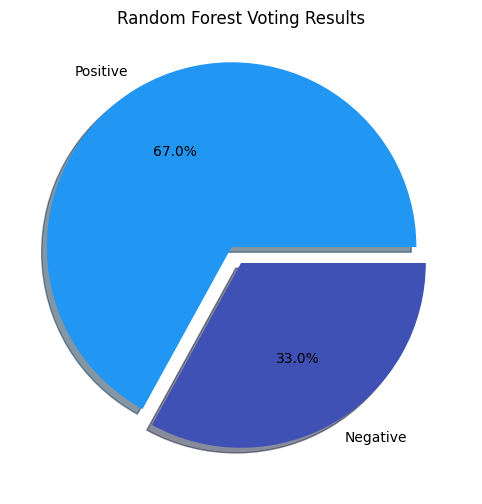

In [69]:
import os
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Function to display scrollable output
def make_scrollable(output, height=300):
    scrollable_output = f"""
    <div style="height: {height}px; overflow-y: scroll; border: 1px solid #ddd; padding: 10px;">
        {output}
    </div>
    """
    display(HTML(scrollable_output))

# Function to make plots scrollable
def make_scrollable_plots(plot_images, height=400):
    plot_html = ""
    for plot_img in plot_images:
        plot_html += f'<img src="{plot_img}" style="max-width: 100%; height: auto; margin-bottom: 10px;">'
    scrollable_plots = f"""
    <div style="height: {height}px; overflow-y: scroll; border: 1px solid #ddd; padding: 10px;">
        {plot_html}
    </div>
    """
    display(HTML(scrollable_plots))

used_trees = []
final_decisions = []
comparison_data = []
plot_images = []
output_folder = "trees"
os.makedirs(output_folder, exist_ok=True)

# Convert Sparse Matrix to CSR (for indexing support)
X_test_fused = X_test_fused.tocsr()

# Choose your sample tweet index
sample_idx = 0
X_sample = X_test_fused[sample_idx]

# Feature Names
feature_names = vectorizer_final.get_feature_names_out().tolist()

# Loop through all the trees
for i in range(100):
    node_indicator = model.estimators_[i].decision_path(X_sample)
    feature = model.estimators_[i].tree_.feature
    leaf_id = model.estimators_[i].apply(X_sample)[0]

    if len(node_indicator.indices) > 1:
        used_trees.append(i)
        last_decision = None

        for node_id in node_indicator.indices:
            if feature[node_id] != -2:  # Not leaf node
                feature_value = X_sample[0, feature[node_id]]
                threshold = model.estimators_[i].tree_.threshold[node_id]
                operator = "<=" if feature_value <= threshold else ">"
                decision = "LEFT ✅" if feature_value <= threshold else "RIGHT ❌"

                last_decision = {
                    "Node": node_id,
                    "Feature": feature_names[feature[node_id]],
                    "Comparison": f"{feature_value:.4f} {operator} {threshold:.4f}",
                    "Threshold": threshold,
                    "Decision": decision
                }
                comparison_data.append(last_decision)

        # Final Prediction
        leaf_class = model.estimators_[i].tree_.value[leaf_id].argmax()
        decision = "Positive" if leaf_class == 1 else "Negative"
        final_decisions.append(decision)

        if last_decision:
            print(f"Tree {i + 1} -> Final Decision: {decision} at Node {last_decision['Node']} "
                  f"({last_decision['Feature']} {last_decision['Comparison']})")

        # Visualize Tree and save as images
        plt.figure(figsize=(20, 10))
        plot_tree(model.estimators_[i],
                  feature_names=feature_names,
                  class_names=["Negative", "Positive"],
                  filled=True,
                  rounded=True,
                  max_depth=4)
        plt.title(f"Tree {i + 1} (Final Decision = {decision})")

        # Save plot to image
        plot_image_path = os.path.join(output_folder, f"tree_{i+1}_plot.png")
        plt.savefig(plot_image_path)
        plt.close()  # Close the plot after saving it
        plot_images.append(plot_image_path)

# Display all the plots in a scrollable container
make_scrollable_plots(plot_images)

# Pie Chart Voting Results
plt.figure(figsize=(10, 6))
plt.pie([final_decisions.count("Positive"), final_decisions.count("Negative")],
        labels=["Positive", "Negative"],
        autopct='%1.1f%%',
        colors=["#2196F3", "#3F51B5"],
        explode=(0.1, 0),
        shadow=True)
plt.title("Random Forest Voting Results")
plt.show()

From the random trees generated I can see that majority of the trees that resulted in a positive predicition was due to the words associated with the final decision node before reaching the leaf node. Since the test set is using the same vectorizer that the training set was fitted with, the vocabulary is extensive. Due to this, the words which were not present in the testing phrases will be assigned a TF-IDF score of 0.00. As we can see from the chart 61% of the trees predicited the tweet as positive. These decisions was based of the words with the score of 0.00 which would not be a fair representation of the prediction. However, I will not be able to remove those words as the training set and testing set has to have the same number of features even if some of the features have values of 0.00. So need to find a way to handle this differently. One possible way is to increase the importance on the key negative word in hopes of more decisions being dependent on that word. Initially, when I derived the offset method to handle the fusing, the negative sentiment scores were being supressed. Now let's boost it as well to maintain the same effect the positive words get. This can be done by adding a abs to the sentiment scores. Futhermore, I will also reduce the ngrams back to 1 so as to place importance on singular words and keep the modal more streamlined instead of overcomplicating it.

I will now test out with the new changes.

In [70]:
df_balanced = pd.read_csv('train_balanced.csv')

vectorizer_finally = TfidfVectorizer()
X = vectorizer_finally.fit_transform(df_balanced['cleaned_tweet'])

# Scale Sentiment Score between -1 and 1
scaler = StandardScaler()
df_balanced['sentiment_score'] = scaler.fit_transform(df_balanced[['sentiment_score']])

# Fuse Sentiment using the offset method
X_fused = X.multiply(1 + abs(df_balanced['sentiment_score'].values.reshape(-1, 1)))

# Training the Model
y = df_balanced['class']
X_train, X_test, y_train, y_test = train_test_split(X_fused, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [71]:
texts = ["He is so fucking annoying", "I am so happy for you"]
df_test = pd.DataFrame({'test_tweet': texts})
df_test['sentiment_score'] = df_test['test_tweet'].apply(lambda x: sia.polarity_scores(x)['compound'])

X_test_vec = vectorizer_finally.transform(df_test['test_tweet'])
df_test['sentiment_score'] = scaler.transform(df_test[['sentiment_score']])

# Fuse Sentiment using offset method
X_test_fused = X_test_vec.multiply(1 + abs(df_test['sentiment_score'].values.reshape(-1, 1)))

# Predict
predictions = model.predict(X_test_fused)

# Display Predictions
for text, pred in zip(df_test['test_tweet'], predictions):
    sentiment = 'Positive' if pred == 1 else 'Negative'
    print(f"{text} ➡️ {sentiment}")

He is so fucking annoying ➡️ Negative
I am so happy for you ➡️ Positive


Nice! As expected now the modal is predicting both the tweets correctly. However, I did realise something. By adding a abs to the sentiment scores, it would not be able to classify phrases like, 'I am so fucking happy for you' correctly as the term 'fucking' will dominate this sentence and even though the sentiment score will be a positive it will turn out to be negative. Early in the project, I did say by adding sentiment score I will be able to tackle such cases, but I did not realise that such cases need to consider the words in the sentences. Meaning, for the sentence, 'I am so fucking happy for you', the sentiment score should penalise the word 'fucking' and 'boost' the word happy. Then the output will be as what I expect. But before doing this, I will first check if the model can classify, 'I am so fucking happy for you' correctly.

In [72]:
texts = ["He is so fucking annoying", "I am so fucking happy for you"]
df_test = pd.DataFrame({'test_tweet': texts})
df_test['sentiment_score'] = df_test['test_tweet'].apply(lambda x: sia.polarity_scores(x)['compound'])

X_test_vec = vectorizer_finally.transform(df_test['test_tweet'])
df_test['sentiment_score'] = scaler.transform(df_test[['sentiment_score']])

# Fuse Sentiment using offset method
X_test_fused = X_test_vec.multiply(1 + abs(df_test['sentiment_score'].values.reshape(-1, 1)))

# Predict
predictions = model.predict(X_test_fused)

# Display Predictions
for text, pred in zip(df_test['test_tweet'], predictions):
    sentiment = 'Positive' if pred == 1 else 'Negative'
    print(f"{text} ➡️ {sentiment}")

He is so fucking annoying ➡️ Negative
I am so fucking happy for you ➡️ Negative


As expected the the second tweet was being classified wrongly. Hence, an alternative approach has to be taken to solve this issue. As explained earlier firstly it is about assigning the appropriate boost and suppress effects to the words in the sentence. After brainstorming I decided to do it this way.

Firstly I will calculate the sentiment score of the tweets from the dataset. Then I will calculate the sentiments of each of the words from the sentence. Following this it will be a bunch if conditional statements.

- If the sentence sentiment score is positive & word sentiment score is positive (I will boost the overall word score) -> Forcing it to be a positive value
- If the sentence sentiment score is negative & word sentiment score is negative (I will boost the overall word score) -> Forcing it to be a positive value
- If the sentence sentiment score is positive & word sentiment score is negative (I will heavily penalize the word score) -> Forcing it to be a negative value
- If the sentence sentiment score is negative & word sentiment score is positive (I will heavily penalize the word score) -> Forcing it to be a negative value

Following this now I will create a custom random forest model which will make decisions based on a specific condition. That condition will be that, the final node that makes a decision leading to the leaf node must not be a feature with the score of 0 or a negative score. This means that I am not removing those features which are not important to the predicition, instead I will be skipping the trees which will has such cases. This way I would not be violating the rule of maintaining the same number of features under the vocabulary of training set and testing set after the vectorization. Moreover, by doing this, the predictions will heavily rely on the features with positive values and this way I would be able to capture the correct classification of the tweet.

When I started to implement this word level sentiment, I came across a situation where the word 'fucking' was actually considered as a neutral word. The word 'fuck' was considered negative but not 'fucking'. These are rare occasions and and I am glad I was able to test out such a case. Hence, I manually gave a negative score to 'fucking' and added it into the VADER vocabulary.

In [73]:
# Step 1: Unlock Hidden Booster Dict 🔑
sia = SentimentIntensityAnalyzer()
sia_booster = sia.constants.BOOSTER_DICT

# Step 2: Nuke the Booster Word
if 'fucking' in sia_booster:
    sia_booster.pop('fucking')
    print("Word 'fucking' DELETED from VADER")

# Step 3: Inject Permanent Custom Score
sia.lexicon['fucking'] = -2.0

Word 'fucking' DELETED from VADER


Now I will start with the conditional statements to boost and suppress the words scores. Here, I would not need to scale these scores as I want them to be reflective of what I explained earlier so that I would be able to maintain the intensity applied to the different words on case to case basis.

In [74]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from scipy.sparse import csr_matrix
import numpy as np

# Function to adjust word scores and return word-level scores
def adjust_word_scores(sentence):
    words = sentence.lower().split()
    sentence_score = sia.polarity_scores(sentence)['compound']
    word_scores = [sia.polarity_scores(word)['compound'] for word in words]
    
    adjusted_scores = []
    for word_score in word_scores:
        if sentence_score > 0:
            if word_score > 0:
                adjusted_scores.append(abs(word_score * 3))  # Boost positive words in positive sentence
            elif word_score < 0:
                adjusted_scores.append((word_score * 1000))  # Suppress negative words in positive sentence 
            else:
                adjusted_scores.append(((word_score + 1) * -1000))  # Suppress negative words in positive sentence (When word score = 0)
        else:
            if word_score < 0:
                adjusted_scores.append(abs(word_score * 3))  # Boost negative words in negative sentence
            elif word_score > 0:
                adjusted_scores.append((word_score * -1000))  # Suppress positive words in negative sentence 
            else:
                adjusted_scores.append(((word_score + 1) * -1000))  # Suppress negative words in positive sentence (When word score = 0)
    
    adjusted_scores = np.array(adjusted_scores).reshape(-1, 1)
    return adjusted_scores.flatten() if len(adjusted_scores) > 0 else np.array([0.0])

# Load dataset
df_balanced = pd.read_csv('train_balanced.csv')

# Adjust sentiment scores for the training data (word-level)
df_balanced['adjusted_word_scores'] = df_balanced['cleaned_tweet'].apply(lambda x: adjust_word_scores(x))

# Vectorize the tweets
vectorizer_final = TfidfVectorizer()
X = vectorizer_final.fit_transform(df_balanced['cleaned_tweet'])

# Fuse Sentiment using word-level fusion
X_fused = X.copy()
row_indices, col_indices = X.nonzero()
feature_names = vectorizer_final.get_feature_names_out().tolist()

for i, (row, col) in enumerate(zip(row_indices, col_indices)):
    word = feature_names[col]
    sentence = df_balanced['cleaned_tweet'].iloc[row]
    words = sentence.lower().split()
    
    if word in words:
        word_idx = words.index(word)
        try:
            X_fused[row, col] *= (1 + df_balanced['adjusted_word_scores'].iloc[row][word_idx])
        except IndexError:
            pass

# Training the Model
y = df_balanced['class']
X_train, X_test, y_train, y_test = train_test_split(X_fused, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

# Testing
texts = ["He is so fucking annoying", "I am so fucking happy for you"]
df_test = pd.DataFrame({'test_tweet': texts})

# Calculate adjusted sentiment scores for test data (word-level)
df_test['adjusted_word_scores'] = df_test['test_tweet'].apply(lambda x: adjust_word_scores(x))

X_test_vec = vectorizer_final.transform(df_test['test_tweet'])
X_test_vec = csr_matrix(X_test_vec)
X_test_fused = X_test_vec.copy()
row_indices, col_indices = X_test_vec.nonzero()

for i, (row, col) in enumerate(zip(row_indices, col_indices)):
    word = feature_names[col]
    sentence = df_test['test_tweet'].iloc[row]
    words = sentence.lower().split()
    
    if word in words:
        word_idx = words.index(word)
        try:
            X_test_fused[row, col] *= (1 + df_test['adjusted_word_scores'].iloc[row][word_idx])
        except IndexError:
            pass

# Print X_test_fused with feature names and their fused scores
X_test_fused_array = X_test_fused.toarray()

print("\nFeature Names and their fused scores:")
for i, text in enumerate(texts):
    print(f"\nText: {text}")
    for j, feature_name in enumerate(feature_names):
        if X_test_fused_array[i, j] != 0:
            print(f"Feature: {feature_name}, Score: {X_test_fused_array[i, j]}")



Feature Names and their fused scores:

Text: He is so fucking annoying
Feature: annoying, Score: 1.1289684769054402
Feature: fucking, Score: 0.8443240614509985
Feature: he, Score: -544.5737382455325
Feature: so, Score: -560.3570936455045

Text: I am so fucking happy for you
Feature: fucking, Score: -206.76221319998712
Feature: happy, Score: 1.4564178882850525
Feature: so, Score: -712.3126150940444


As expected words which are not important to the sentence now have an extreme scores, which can then be filtered out by the custom random forest model. Now, I will move onto building the custom random forest model.

The idea is to recursively check if the feature is meeting the set conditions and marking those paths as valid paths.

At each node, a decision path will be contruscted that records the feature and its value from the sample.
This path helps in understanding how the final decision is made.

When a leaf node is reached, the method checks if the path is valid and if the final value (feature value at the last decision point) is positive and non-zero then returns the prediction.

To enhance the training process, I will also perform incremental improvement using warm start as a parameter for the random forest model. This way I am able to add more trees without retraining the model from scratch. By doing so, the model is able to adapt to new information. Particularly for NLP tasks, by continuosly updating the model with data and with the addition of trees, it enhances the model preparing it for the future.

In [75]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

class CustomRandomForest:
    def __init__(self, model, feature_names):
        self.model = model
        self.feature_names = feature_names
        
    def _traverse_tree(self, tree, node, sample, path_valid, final_value=None):
        if tree.feature[node] == -2:  # Leaf node
            if path_valid and (final_value is not None and final_value != 0.00) and (final_value > 0): # When the decision node is a positive value and not zero
                return tree.value[node].argmax(), [] # Returning prediction only if the final node was positive and not zero (Selecting majority class)
            else:
                return None, [] # Invalid path

        feature_index = tree.feature[node]
        threshold = tree.threshold[node]

        # Construction of the decision path
        if feature_index < len(self.feature_names) and feature_index < len(sample):
            decision_path = [(self.feature_names[feature_index], sample[feature_index])]
            final_value = sample[feature_index]  
        else:
            decision_path = [("unknown_feature", "index_out_of_bounds")]

        # Path validity checker 
        if feature_index < len(sample) and sample[feature_index] > 0: # Checking if the value of the current feature is more than 0
            path_valid = True

        if feature_index >= len(sample) or sample[feature_index] <= 0: # If the value of the current feature is 0 or a negative value
            left, left_path = self._traverse_tree(tree, tree.children_left[node], sample, path_valid, final_value)
            right, right_path = self._traverse_tree(tree, tree.children_right[node], sample, path_valid, final_value)
            if left is not None:
                return left, decision_path + left_path
            else:
                return right, decision_path + right_path

        # Normal random forest movement condition
        if sample[feature_index] <= threshold:
            pred, path = self._traverse_tree(tree, tree.children_left[node], sample, path_valid, final_value)
            if pred is not None:
                return pred, decision_path + path
        else:
            pred, path = self._traverse_tree(tree, tree.children_right[node], sample, path_valid, final_value)
            if pred is not None:
                return pred, decision_path + path

        return None, []

    def predict(self, X):
        predictions = []
        for i, sample in enumerate(X):
            tree_preds = []
            tree_decisions = []

            for j, estimator in enumerate(self.model.estimators_):
                tree = estimator.tree_
                prediction, decision_path = self._traverse_tree(tree, 0, sample, False)

                if prediction is not None:
                    # Ensure the path does not end with a zero feature
                    if any(val != 0 for feat, val in decision_path):
                        tree_preds.append(prediction)
                        decision_str = f"Tree {j+1} -> Final Decision: {'\033[1mPositive\033[0m' if prediction == 1 else '\033[1mNegative\033[0m'}"
                        decision_str += " | Path: " + " -> ".join([f"{feat} = {val}" for feat, val in decision_path])
                        tree_decisions.append(decision_str)

            if len(tree_preds) == 0:
                predictions.append(np.nan)  # If no valid trees, return NaN
            else:
                final_pred = np.bincount(tree_preds).argmax()
                predictions.append(final_pred)

            print(f"Sample {i+1} Decisions:")
            for decision in tree_decisions:
                print(decision)
            print()

        return np.array(predictions)

# Example Usage:
if __name__ == "__main__":
    max_iterations = 10  # Number of retrainings
    model = RandomForestClassifier(warm_start=True)
    for i in range(max_iterations):
        model.n_estimators += 10
        model.fit(X_train, y_train)

    if hasattr(X_test_fused, "toarray"):
        X_test_dense = X_test_fused.toarray()
    else:
        X_test_dense = X_test_fused

    custom_rf = CustomRandomForest(model, feature_names)
    y_pred = custom_rf.predict(X_test_dense)
    print("Predictions:", y_pred)

Sample 1 Decisions:
Tree 1 -> Final Decision: Negative | Path: son = 0.0 -> yankee = 0.0 -> died = 0.0 -> redskin = 0.0 -> cracker = 0.0 -> niggah = 0.0 -> bird = 0.0 -> yanks = 0.0 -> yall = 0.0 -> im = 0.0 -> beanies = 0.0 -> conan = 0.0 -> evolve = 0.0 -> great = 0.0 -> slant = 0.0 -> baker = 0.0 -> stop = 0.0 -> lmao = 0.0 -> da = 0.0 -> apes = 0.0 -> america = 0.0 -> well = 0.0 -> ass = 0.0 -> scott = 0.0 -> right = 0.0 -> nice = 0.0 -> girl = 0.0 -> episode = 0.0 -> hoes = 0.0 -> going = 0.0 -> bitch = 0.0 -> let = 0.0 -> lh = 0.0 -> brownie = 0.0 -> biggest = 0.0 -> ghetto = 0.0 -> charlie = 0.0 -> read = 0.0 -> ya = 0.0 -> calling = 0.0 -> picture = 0.0 -> yellow = 0.0 -> nip = 0.0 -> ipad = 0.0 -> know = 0.0 -> bitch = 0.0 -> try = 0.0 -> fags = 0.0 -> born = 0.0 -> pearl = 0.0 -> fight = 0.0 -> knows = 0.0 -> amazement = 0.0 -> yo = 0.0 -> ever = 0.0 -> drug = 0.0 -> colored = 0.0 -> niggers = 0.0 -> leave = 0.0 -> jihadi = 0.0 -> phony = 0.0 -> swiggety = 0.0 -> philly = 0.0

Finally! Managed to get the desired output. Now the model is able to classify both the tweets correctly. 

Cases like 'He is so fucking annoying', 'I am so happy', 'I am so fucking happy for you' will now be classified correctly. I will include the final model tester in the following section, where I can use the model to test out on any tweets.

<div style="padding:10px; /* Smaller padding */
              color:#1DA1F2; 
              font-size:150%; /* Smaller Font */
              border-radius:20px; 
              border-width: 3px; /* Thinner Border */
              border-style: solid; 
              border-color: #1DA1F2; 
              background-color:white; 
              font-weight:500; 
              letter-spacing: 1px; 
              text-shadow: 1px 1px 5px rgba(29,161,242,0.8); 
              box-shadow: 0 0 10px rgba(29,161,242,0.5); 
              display: inline-block; 
              width: auto; /* Smaller Width */
              margin: auto;">8 |
  Final Model Tester
  </div>

In [76]:
# Testing
texts = ["He is so fucking annoying", "I am so fucking happy for you"]
df_test = pd.DataFrame({'test_tweet': texts})

# Calculate adjusted sentiment scores for test data (word-level)
df_test['adjusted_word_scores'] = df_test['test_tweet'].apply(lambda x: adjust_word_scores(x))

X_test_vec = vectorizer_final.transform(df_test['test_tweet'])
X_test_vec = csr_matrix(X_test_vec)
X_test_fused = X_test_vec.copy()
row_indices, col_indices = X_test_vec.nonzero()

for i, (row, col) in enumerate(zip(row_indices, col_indices)):
    word = feature_names[col]
    sentence = df_test['test_tweet'].iloc[row]
    words = sentence.split()
    
    if word in words:
        word_idx = words.index(word)
        try:
            X_test_fused[row, col] *= (1 + df_test['adjusted_word_scores'].iloc[row][word_idx])
        except IndexError:
            pass

# Print X_test_fused with feature names and their fused scores
X_test_fused_array = X_test_fused.toarray()


# Example usage:
if __name__ == "__main__":

    if hasattr(X_test_fused, "toarray"):
        X_test_dense = X_test_fused.toarray()
    else:
        X_test_dense = X_test_fused

    custom_rf = CustomRandomForest(model, feature_names)
    y_pred = custom_rf.predict(X_test_dense)
    print("Predictions:", y_pred)

Sample 1 Decisions:
Tree 1 -> Final Decision: Negative | Path: son = 0.0 -> yankee = 0.0 -> died = 0.0 -> redskin = 0.0 -> cracker = 0.0 -> niggah = 0.0 -> bird = 0.0 -> yanks = 0.0 -> yall = 0.0 -> im = 0.0 -> beanies = 0.0 -> conan = 0.0 -> evolve = 0.0 -> great = 0.0 -> slant = 0.0 -> baker = 0.0 -> stop = 0.0 -> lmao = 0.0 -> da = 0.0 -> apes = 0.0 -> america = 0.0 -> well = 0.0 -> ass = 0.0 -> scott = 0.0 -> right = 0.0 -> nice = 0.0 -> girl = 0.0 -> episode = 0.0 -> hoes = 0.0 -> going = 0.0 -> bitch = 0.0 -> let = 0.0 -> lh = 0.0 -> brownie = 0.0 -> biggest = 0.0 -> ghetto = 0.0 -> charlie = 0.0 -> read = 0.0 -> ya = 0.0 -> calling = 0.0 -> picture = 0.0 -> yellow = 0.0 -> nip = 0.0 -> ipad = 0.0 -> know = 0.0 -> bitch = 0.0 -> try = 0.0 -> fags = 0.0 -> born = 0.0 -> pearl = 0.0 -> fight = 0.0 -> knows = 0.0 -> amazement = 0.0 -> yo = 0.0 -> ever = 0.0 -> drug = 0.0 -> colored = 0.0 -> niggers = 0.0 -> leave = 0.0 -> jihadi = 0.0 -> phony = 0.0 -> swiggety = 0.0 -> philly = 0.0

Tree 1 -> Final Decision: Positive at Node 2080 (happy 1.4564 > 0.3054)
Tree 2 -> Final Decision: Positive at Node 2160 (happy 1.4564 > 0.3054)
Tree 4 -> Final Decision: Positive at Node 1975 (happy 1.4564 > 0.4122)
Tree 6 -> Final Decision: Negative at Node 2180 (happy 1.4564 > 1.2734)
Tree 10 -> Final Decision: Negative at Node 2522 (happy 1.4564 > 1.2734)
Tree 11 -> Final Decision: Negative at Node 1872 (happy 1.4564 > -153.2603)
Tree 17 -> Final Decision: Positive at Node 2432 (happy 1.4564 > -83.9086)
Tree 21 -> Final Decision: Positive at Node 1811 (happy 1.4564 > 0.2942)
Tree 22 -> Final Decision: Negative at Node 1590 (happy 1.4564 > 1.2416)
Tree 24 -> Final Decision: Positive at Node 1474 (happy 1.4564 > 0.2942)
Tree 25 -> Final Decision: Negative at Node 1876 (happy 1.4564 > 1.2734)
Tree 26 -> Final Decision: Negative at Node 2362 (happy 1.4564 > 1.1591)
Tree 28 -> Final Decision: Positive at Node 2539 (happy 1.4564 > 0.2942)
Tree 29 -> Final Decision: Negative at Node 2360 (

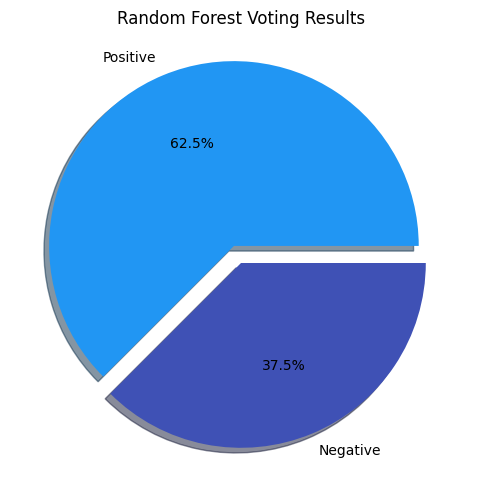

In [77]:
import os
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from scipy.sparse import csr_matrix

# Function to display scrollable output
def make_scrollable(output, height=300):
    scrollable_output = f"""
    <div style="height: {height}px; overflow-y: scroll; border: 1px solid #ddd; padding: 10px;">
        {output}
    </div>
    """
    display(HTML(scrollable_output))

# Function to make plots scrollable
def make_scrollable_plots(plot_images, height=400):
    plot_html = ""
    for plot_img in plot_images:
        plot_html += f'<img src="{plot_img}" style="max-width: 100%; height: auto; margin-bottom: 10px;">'
    scrollable_plots = f"""
    <div style="height: {height}px; overflow-y: scroll; border: 1px solid #ddd; padding: 10px;">
        {plot_html}
    </div>
    """
    display(HTML(scrollable_plots))

used_trees = []
final_decisions = []
comparison_data = []
plot_images = []
output_folder = "trees"
os.makedirs(output_folder, exist_ok=True)

# Convert Sparse Matrix to CSR (for indexing support)
# Choose your sample tweet index
sample_idx = 1
X_sample = X_test_fused[sample_idx]

# Ensure X_sample is a 2D array
X_sample = X_sample.toarray().reshape(1, -1)

# Feature Names
feature_names = vectorizer_final.get_feature_names_out().tolist()

# Custom Prediction with Visualization
for i in range(len(model.estimators_)):
    node_indicator = model.estimators_[i].decision_path(X_sample)
    feature = model.estimators_[i].tree_.feature
    leaf_id = model.estimators_[i].apply(X_sample)[0]

    if len(node_indicator.indices) > 1:
        used_trees.append(i)
        last_decision = None

        for node_id in node_indicator.indices:
            if feature[node_id] != -2:  # Not leaf node
                feature_value = X_sample[0, feature[node_id]]
                threshold = model.estimators_[i].tree_.threshold[node_id]
                operator = "<=" if feature_value <= threshold else ">"
                decision = "LEFT ✅" if feature_value <= threshold else "RIGHT ❌"

                if feature_value <= 0.0:
                    continue  

                last_decision = {
                    "Node": node_id,
                    "Feature": feature_names[feature[node_id]],
                    "Comparison": f"{feature_value:.4f} {operator} {threshold:.4f}",
                    "Threshold": threshold,
                    "Decision": decision
                }
                comparison_data.append(last_decision)

        # Final Prediction
        leaf_class = model.estimators_[i].tree_.value[leaf_id].argmax()
        decision = "Positive" if leaf_class == 1 else "Negative"
        final_decisions.append(decision)

        if last_decision:
            print(f"Tree {i + 1} -> Final Decision: {decision} at Node {last_decision['Node']} "
                  f"({last_decision['Feature']} {last_decision['Comparison']})")

        # Visualize Tree and save as images
        plt.figure(figsize=(20, 10))
        plot_tree(model.estimators_[i],
                  feature_names=feature_names,
                  class_names=["Negative", "Positive"],
                  filled=True,
                  rounded=True,
                  max_depth=4)
        plt.title(f"Tree {i + 1} (Final Decision = {decision})")

        # Save plot to image
        plot_image_path = os.path.join(output_folder, f"tree_{i+1}_plot.png")
        plt.savefig(plot_image_path)
        plt.close()  # Close the plot after saving it
        plot_images.append(plot_image_path)

# Display all the plots in a scrollable container
make_scrollable_plots(plot_images)

# Pie Chart Voting Results
plt.figure(figsize=(10, 6))
plt.pie([final_decisions.count("Positive"), final_decisions.count("Negative")],
        labels=["Positive", "Negative"],
        autopct='%1.1f%%',
        colors=["#2196F3", "#3F51B5"], 
        explode=(0.1, 0),
        shadow=True)
plt.title("Random Forest Voting Results")
plt.show()

Now I will move onto the final portion of this notebook which will sum up the entire process.

<div style="padding:10px; /* Smaller padding */
              color:#1DA1F2; 
              font-size:150%; /* Smaller Font */
              border-radius:20px; 
              border-width: 3px; /* Thinner Border */
              border-style: solid; 
              border-color: #1DA1F2; 
              background-color:white; 
              font-weight:500; 
              letter-spacing: 1px; 
              text-shadow: 1px 1px 5px rgba(29,161,242,0.8); 
              box-shadow: 0 0 10px rgba(29,161,242,0.5); 
              display: inline-block; 
              width: auto; /* Smaller Width */
              margin: auto;">9 |
  Conclusion
  </div>

<div style="display: flex; gap: 20px; align-items: center;">
  <div style="margin-right: auto;">
  <p>This entire journey has been fullfilling one.<p>

  <p>Firstly, I started with the exploratory data analysis. This was done using pandas to perform text based analysis while also generating charts using various visualization libraries. Through this I got to attain a deeper understanding on the data set and the features I am working with for this particular NLP task. I gained valuable insights which played a huge part throughout this project.<p>

  <p>Moving, on I started with the data preprocessing & data cleaning where I cleaned up the data and prepared it for feature engineering. Tasks included removing stopwords, removing unwanted words and punctuations.<p>

  <p>I then started with feature engineering where I made use of the existing columns and generated valuable information which can be used to value add during the modelling. Additions included, stemming & lemmatization, oversampling & undersampling, addition of sentiment polarity scores using VADER, weights scoring through diagreement penalty method.<p>

  <p>Now, I got to modelling where I streamlined different classification algorithms by using pipelines. With the classifications algorithms working hand in hand with the vectorizers, I was able to train and test out the different models. Conducted various experiments such as using weights during modelling and using different vectorizers for the modelling to make informed conclusions before moving onto the hyperparameter tuning. I also narrowed down to the most successful 2 models which were SVMs and Random forest models.<p>

  <p>At this junction of the notebook, I made use of grid search to generate the most suitable hyperparameters for models in hopes of attaining a better accuracy. I then evaluated if the usage of hyperparameters were useful for the two different models. After evaluations, I decided moving on I will be making use of random forest models without tuning to allow its element of randomness to shine.<p>

  <p>Now, I reached the portion I spent the most time on in this notebook. Re-evaluation & further enhancements. Here is where I tested out the models with sample tweets and evaluated the success of the models. I faced neumerous challenges attaining the desired prediction. It was like solving a crime scene with many loopholes. Every loophole allowed me to critically think of ways to overcome it. Some key features implemented here to attain the desired prediction was, usage of ngrams, VADER sentiment scores, offset fusion multiplier (VADER), lemmatized words + original words, individual word sentiment score comparison against sentence sentiment score, and custom random forest model with specific rule sets. These features collectively value added to attain the best performing model at the end of the notebook. <p>

  <p>Follwing this I included the tester for the model, where I can make use of the latest model to classify any sentences.<p>

  <p>In a nuts shell, I learnt a lot while working on this NLP task. Looking forward to more data science tasks in the future!<p>

  <p>Thank you!<p>
  </div>
    <img src="smiley.png" alt="Image Description" width="400" style="border-radius: 10px; box-shadow: 0 0 15px rgba(29,161,242,0.8);">

</div>



<div style="padding:10px; /* Smaller padding */
              color:#1DA1F2; 
              font-size:150%; /* Smaller Font */
              border-radius:20px; 
              border-width: 3px; /* Thinner Border */
              border-style: solid; 
              border-color: #1DA1F2; 
              background-color:white; 
              font-weight:500; 
              letter-spacing: 1px; 
              text-shadow: 1px 1px 5px rgba(29,161,242,0.8); 
              box-shadow: 0 0 10px rgba(29,161,242,0.5); 
              display: inline-block; 
              width: auto; /* Smaller Width */
              margin: auto;">10 |
  References
  </div>

#### Image References
1. [Emoji Sentiment Analysis](https://bluemoji.io/)
2. [Stop Words](https://www.google.com/url?sa=i&url=https%3A%2F%2Fbotpenguin.com%2Fglossary%2Fstop-words&psig=AOvVaw3YrI2o4yu7NWi75-ZInAvq&ust=1741275339231000&source=images&cd=vfe&opi=89978449&ved=0CBAQjRxqFwoTCIiS_6Gi84sDFQAAAAAdAAAAABAE/)
3. [Sentiment Score Distribution](https://www.google.com/url?sa=i&url=https%3A%2F%2Fmedium.com%2F%40avicsebooks%2Fpart-18-ml-deep-learning-and-reinforcement-learning-468f7340aaf1&psig=AOvVaw29_Ie2acunssyWtbJ9SuTC&ust=1741275366654000&source=images&cd=vfe&opi=89978449&ved=0CBAQjRxqFwoTCLDs-66i84sDFQAAAAAdAAAAABAE)
4. [Emotion Categories](https://www.google.com/url?sa=i&url=https%3A%2F%2Frozwarner.com%2F2017%2F08%2F12%2Fgoverning-from-the-gut-emotion-in-world-politics%2F&psig=AOvVaw14fjPF3KCEqKGPS8tEBEUz&ust=1741275400811000&source=images&cd=vfe&opi=89978449&ved=0CBAQjRxqFwoTCKiBtb-i84sDFQAAAAAdAAAAABAE)
5. [VADER Sentiment Scoring Process](https://www.researchgate.net/figure/VADER-Sentiment-Scoring-Process_fig1_371247846)
6. [Class Balancing Techniques](https://www.researchgate.net/figure/Class-balancing-random-undersampling-and-random-oversampling_fig4_360676832)
7. [Lemmatization](https://botpenguin.com/glossary/lemmatization)
8. [Stemming Process](https://www.google.com/url?sa=i&url=https%3A%2F%2Fbotpenguin.com%2Fglossary%2Fstemming&psig=AOvVaw1s-cIIDHIwbE13L2Vb-yqx&ust=1741275424725000&source=images&cd=vfe&opi=89978449&ved=0CBAQjRxqFwoTCND71sqi84sDFQAAAAAdAAAAABAE)
9. [Twitter Blue](https://www.digitaltrends.com/social-media/what-is-twitter-blue-and-is-it-worth-it/)
10. [Hate Speech Word Cloud](https://www.ukposters.co.uk/hate-speech-word-cloud-on-blue-background-f774661063)

---

#### Notebook References
1. [Twitter Sentiment Extraction - EDA & Model](https://www.kaggle.com/code/tanulsingh077/twitter-sentiment-extaction-analysis-eda-and-model)
2. [Hate Speech Detection (English)](https://www.kaggle.com/code/minthihatun/hate-speech-detection-english)
3. [Beginner Guide for Sentiment Analysis (95% Accuracy)](https://www.kaggle.com/code/ppsheth91/beginner-guide-for-sentiment-analysis-95-accuracy)
4. [Predicting Hate Speech using Machine Learning](https://www.kaggle.com/code/abuchionwuegbusi/predicting-hate-speech-using-machine-learningg)